In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import seaborn as sns

import scipy.stats as stats
from scipy.stats import ttest_1samp, ttest_ind, ttest_rel, chi2_contingency
from statsmodels.stats.power import ttest_power
import statsmodels.stats.power as smp
import statsmodels.stats.api as sm

from scipy.stats import shapiro
from scipy.stats import levene

from statsmodels.formula.api import ols      # For n-way ANOVA
from statsmodels.stats.anova import anova_lm # For n-way ANOVA

from statsmodels.stats.multicomp import MultiComparison
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from sklearn.preprocessing import LabelEncoder 
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from scipy.stats import zscore
from sklearn.decomposition import PCA
from matplotlib.patches import Rectangle

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo

### Read the Data

In [2]:
df = pd.read_excel('innercity.xlsx')

### Basic Data Exploration

Perform basic data exploration using Head, info and shape functions

In [3]:
df.head().T

,0,1,2,3,4
cid,3876100940,3145600250,7129303070,7338220280,7950300670
dayhours,20150427T000000,20150317T000000,20140820T000000,20141010T000000,20150218T000000
price,600000,190000,735000,257000,450000
room_bed,4.0,2.0,4.0,3.0,2.0
room_bath,1.75,1.0,2.75,2.5,1.0
living_measure,3050.0,670.0,3040.0,1740.0,1120.0
lot_measure,9440.0,3101.0,2415.0,3721.0,4590.0
ceil,1,1,2,2,1
coast,0,0,1,0,0
sight,0.0,0.0,4.0,0.0,0.0


In [4]:
df.shape

(21613, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cid               21613 non-null  int64  
 1   dayhours          21613 non-null  object 
 2   price             21613 non-null  int64  
 3   room_bed          21505 non-null  float64
 4   room_bath         21505 non-null  float64
 5   living_measure    21596 non-null  float64
 6   lot_measure       21571 non-null  float64
 7   ceil              21571 non-null  object 
 8   coast             21612 non-null  object 
 9   sight             21556 non-null  float64
 10  condition         21556 non-null  object 
 11  quality           21612 non-null  float64
 12  ceil_measure      21612 non-null  float64
 13  basement          21612 non-null  float64
 14  yr_built          21612 non-null  object 
 15  yr_renovated      21613 non-null  int64  
 16  zipcode           21613 non-null  int64 

In [6]:
df.nunique().sort_values(ascending=False)

cid                 21436
total_area          11145
lot_measure          9765
lot_measure15        8682
lat                  5034
price                3625
living_measure       1038
ceil_measure          946
living_measure15      774
long                  753
dayhours              372
basement              306
yr_built              117
yr_renovated           70
zipcode                70
room_bath              30
room_bed               13
quality                12
ceil                    7
condition               6
sight                   5
coast                   3
furnished               2
dtype: int64

In [7]:
dups = df.duplicated()
print('Number of duplicate rows = %d' % (dups.sum()))

Number of duplicate rows = 0


In [8]:
df.select_dtypes(include='object').head()

,dayhours,ceil,coast,condition,yr_built,long,total_area
0,20150427T000000,1,0,3,1966,-122.183,12490
1,20150317T000000,1,0,4,1948,-122.274,3771
2,20140820T000000,2,1,3,1966,-122.256,5455
3,20141010T000000,2,0,3,2009,-122.213,5461
4,20150218T000000,1,0,3,1924,-122.285,5710


In [9]:
### Geting unique counts of all Objects
for feature in df.columns: 
    if df[feature].dtype == 'object': 
        print(feature)
        print(df[feature].value_counts())
        print('\n')

dayhours
dayhours
20140623T000000    142
20140625T000000    131
20140626T000000    131
20140708T000000    127
20150427T000000    126
                  ... 
20150515T000000      1
20150110T000000      1
20140803T000000      1
20150131T000000      1
20140830T000000      1
Name: count, Length: 372, dtype: int64


ceil
ceil
1      10647
2       8210
1.5     1905
3        610
2.5      161
$         30
3.5        8
Name: count, dtype: int64


coast
coast
0    21421
1      161
$       30
Name: count, dtype: int64


condition
condition
3    13978
4     5655
5     1694
2      171
1       30
$       28
Name: count, dtype: int64


yr_built
yr_built
2014    559
2006    454
2005    450
2004    433
2003    421
       ... 
1901     29
1902     27
1935     24
1934     21
$        14
Name: count, Length: 117, dtype: int64


long
long
-122.290    116
-122.300    111
-122.362    104
-122.291    100
-122.372     99
           ... 
-122.474      1
-121.711      1
-121.845      1
-121.737      1
-121.947   

In [10]:
# Boolean indexing to filter rows with '$' in the 'ceil' column
rows_with_dollar = df[df['long'].astype(str).str.contains('\$')]

# Print rows with '$' in the 'ceil' column
rows_with_dollar

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
5,8016250080,20140709T000000,245000,3.0,2.50,1610.0,7223.0,2,0,0.0,...,0.0,1994,0,98030,47.3661,$,1610.0,7162.0,0.0,8833
1408,3782100035,20140813T000000,299000,3.0,1.00,960.0,8100.0,1,0,0.0,...,0.0,1955,0,98155,47.7763,$,1080.0,8100.0,0.0,9060
1961,2206700215,20150422T000000,550000,4.0,2.00,2070.0,9822.0,1,0,0.0,...,0.0,1955,0,98006,47.5660,$,1300.0,9572.0,0.0,11892
5153,1941400080,20141020T000000,277000,3.0,2.25,1610.0,11920.0,1,0,0.0,...,500.0,1968,0,98032,47.3683,$,1690.0,11839.0,0.0,13530
5413,1930301015,20150428T000000,818000,3.0,3.25,2200.0,4800.0,2,0,2.0,...,290.0,1943,1996,98103,47.6551,$,1410.0,4800.0,0.0,7000
6362,3830630310,20140725T000000,260000,3.0,2.50,1670.0,5797.0,2,0,0.0,...,0.0,1988,0,98030,47.3505,$,1670.0,6183.0,0.0,7467
7983,6072400280,20140619T000000,619850,4.0,2.50,2270.0,9247.0,1,0,0.0,...,770.0,1972,0,98006,47.5602,$,2270.0,9163.0,0.0,11517
8230,567000660,20141204T000000,425000,4.0,2.00,1490.0,5300.0,1,0,0.0,...,380.0,1977,0,98144,47.5949,$,1330.0,1499.0,0.0,6790
8586,5135000050,20140801T000000,960000,4.0,2.50,2820.0,5934.0,1,0,3.0,...,1050.0,1952,0,98116,47.5706,$,2230.0,6000.0,1.0,8754
9930,1952000150,20140506T000000,530000,5.0,2.50,2910.0,9636.0,1,0,0.0,...,1220.0,1964,0,98008,47.5803,$,2830.0,10385.0,0.0,12546


In [11]:

import re

# Assuming 'df' is your DataFrame
has_other_symbols = pd.DataFrame()

for column in df.columns:
    if df[column].dtype == 'object':
        has_other_symbols[column] = df[column].str.contains('[^\d.$]', regex=True)

# Select rows where any column contains other symbols
rows_with_symbols = df[has_other_symbols.any(axis=1)]

# Display the rows
has_other_symbols



,dayhours,ceil,coast,condition,yr_built,long,total_area
0,True,NaN,NaN,NaN,NaN,NaN,NaN
1,True,NaN,NaN,NaN,NaN,NaN,NaN
2,True,NaN,NaN,NaN,NaN,NaN,NaN
3,True,NaN,NaN,NaN,NaN,NaN,NaN
4,True,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
21608,True,NaN,NaN,NaN,NaN,NaN,NaN
21609,True,NaN,NaN,NaN,NaN,NaN,NaN
21610,True,NaN,NaN,NaN,NaN,NaN,NaN
21611,True,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
print(df['dayhours'].unique())
print(df['yr_built'].unique())
print(df['long'].unique())

['20150427T000000' '20150317T000000' '20140820T000000' '20141010T000000'
 '20150218T000000' '20140709T000000' '20140715T000000' '20140618T000000'
 '20140721T000000' '20141028T000000' '20140502T000000' '20150123T000000'
 '20141029T000000' '20150311T000000' '20140822T000000' '20140522T000000'
 '20140819T000000' '20150428T000000' '20150212T000000' '20140909T000000'
 '20141125T000000' '20140818T000000' '20140719T000000' '20141230T000000'
 '20150112T000000' '20140829T000000' '20150501T000000' '20140811T000000'
 '20141103T000000' '20140620T000000' '20141203T000000' '20141030T000000'
 '20141208T000000' '20140903T000000' '20140610T000000' '20150422T000000'
 '20140625T000000' '20150222T000000' '20150113T000000' '20140923T000000'
 '20140624T000000' '20150128T000000' '20141014T000000' '20150316T000000'
 '20140912T000000' '20140606T000000' '20141017T000000' '20140827T000000'
 '20150225T000000' '20140707T000000' '20150403T000000' '20140712T000000'
 '20140603T000000' '20140508T000000' '20141009T0000

In [13]:
rows_with_symbols_ceil = df[df['ceil'].str.contains('[^\d.]|\$', na=False)]
rows_with_symbols_coast = df[df['coast'].str.contains('[^\d.]|\$', na=False)]


In [14]:
# Convert 'dayhours' column to timestamp
df['dayhours'] = pd.to_datetime(df['dayhours'], format='%Y%m%dT%H%M%S')

# Check the updated DataFrame
df['dayhours']

0       2015-04-27
1       2015-03-17
2       2014-08-20
3       2014-10-10
4       2015-02-18
           ...    
21608   2015-03-10
21609   2014-05-21
21610   2014-09-05
21611   2015-02-06
21612   2014-12-29
Name: dayhours, Length: 21613, dtype: datetime64[ns]

In [15]:
df_date=df.copy()

df_date['month_year']=df['dayhours'].apply(lambda x: x.strftime('%B-%Y'))
df_date['month_year'].head()

0       April-2015
1       March-2015
2      August-2014
3     October-2014
4    February-2015
Name: month_year, dtype: object

In [16]:
df_date['month_year'].value_counts()

month_year
April-2015        2231
July-2014         2211
June-2014         2180
August-2014       1940
October-2014      1878
March-2015        1875
September-2014    1774
May-2014          1768
December-2014     1471
November-2014     1411
February-2015     1250
January-2015       978
May-2015           646
Name: count, dtype: int64

In [17]:
df_date.head().T

,0,1,2,3,4
cid,3876100940,3145600250,7129303070,7338220280,7950300670
dayhours,2015-04-27 00:00:00,2015-03-17 00:00:00,2014-08-20 00:00:00,2014-10-10 00:00:00,2015-02-18 00:00:00
price,600000,190000,735000,257000,450000
room_bed,4.0,2.0,4.0,3.0,2.0
room_bath,1.75,1.0,2.75,2.5,1.0
living_measure,3050.0,670.0,3040.0,1740.0,1120.0
lot_measure,9440.0,3101.0,2415.0,3721.0,4590.0
ceil,1,1,2,2,1
coast,0,0,1,0,0
sight,0.0,0.0,4.0,0.0,0.0


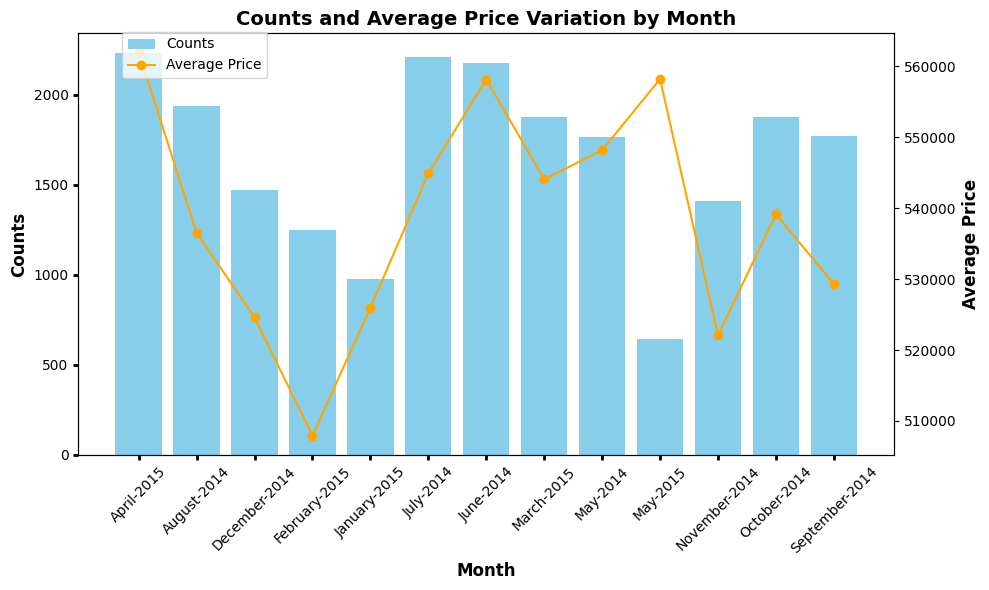

In [18]:
import matplotlib.pyplot as plt

# Calculate counts per month
counts_per_month = df_date['month_year'].value_counts().sort_index()

# Calculate average price per month
avg_price_per_month = df_date.groupby('month_year')['price'].mean().sort_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(10, 6))

# Plot counts per month
color = 'skyblue'
ax1.bar(counts_per_month.index, counts_per_month, color=color, label='Counts')
ax1.set_ylabel('Counts', fontsize=12, fontweight='bold', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for price
ax2 = ax1.twinx()  
color = 'orange'
ax2.plot(avg_price_per_month.index, avg_price_per_month, color=color, marker='o', label='Average Price')
ax2.set_ylabel('Average Price', fontsize=12, fontweight='bold', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Customize plot
plt.title('Counts and Average Price Variation by Month', fontsize=14, fontweight='bold')
ax1.set_xlabel('Month', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', labelrotation=45, labelcolor='black')
plt.xticks(rotation=45, color='black', fontweight='bold')
ax1.tick_params(axis='both', labelsize=10, width=2)

# Show legend
fig.legend(loc='upper left', bbox_to_anchor=(0.12,0.95))

# Show plot
plt.tight_layout()
plt.show()


In [19]:
df['ceil']=df['ceil'].replace('$',np.nan).astype(str).astype('float64')

C:\Users\91994\AppData\Local\Temp\ipykernel_11424\3153603430.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ceil']=df['ceil'].replace('$',np.nan).astype(str).astype('float64')


In [20]:
df['coast']=df['coast'].replace('$',np.nan).astype(str).astype('float64')

C:\Users\91994\AppData\Local\Temp\ipykernel_11424\2215514190.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['coast']=df['coast'].replace('$',np.nan).astype(str).astype('float64')


In [21]:
df['yr_built']=df['yr_built'].replace('$',np.nan).astype(str).astype('float64')

C:\Users\91994\AppData\Local\Temp\ipykernel_11424\1266971689.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['yr_built']=df['yr_built'].replace('$',np.nan).astype(str).astype('float64')


In [22]:
df['long']=df['long'].replace('$',np.nan).astype(str).astype('float64')

C:\Users\91994\AppData\Local\Temp\ipykernel_11424\2806738635.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['long']=df['long'].replace('$',np.nan).astype(str).astype('float64')


In [23]:
df['total_area']=df['total_area'].replace('$',np.nan).astype(str).astype('float64')

C:\Users\91994\AppData\Local\Temp\ipykernel_11424\3191995013.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['total_area']=df['total_area'].replace('$',np.nan).astype(str).astype('float64')


In [24]:
df['condition']=df['condition'].replace('$',np.nan).astype(str).astype('float64')

C:\Users\91994\AppData\Local\Temp\ipykernel_11424\1158296307.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['condition']=df['condition'].replace('$',np.nan).astype(str).astype('float64')


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   cid               21613 non-null  int64         
 1   dayhours          21613 non-null  datetime64[ns]
 2   price             21613 non-null  int64         
 3   room_bed          21505 non-null  float64       
 4   room_bath         21505 non-null  float64       
 5   living_measure    21596 non-null  float64       
 6   lot_measure       21571 non-null  float64       
 7   ceil              21541 non-null  float64       
 8   coast             21582 non-null  float64       
 9   sight             21556 non-null  float64       
 10  condition         21528 non-null  float64       
 11  quality           21612 non-null  float64       
 12  ceil_measure      21612 non-null  float64       
 13  basement          21612 non-null  float64       
 14  yr_built          2159

In [26]:
df.isnull().sum()

cid                   0
dayhours              0
price                 0
room_bed            108
room_bath           108
living_measure       17
lot_measure          42
ceil                 72
coast                31
sight                57
condition            85
quality               1
ceil_measure          1
basement              1
yr_built             15
yr_renovated          0
zipcode               0
lat                   0
long                 34
living_measure15    166
lot_measure15        29
furnished            29
total_area           68
dtype: int64

In [27]:
#For geographic visual
import geopandas as gpd
from shapely.geometry import Point, Polygon
#For current working directory
import os
cwd = os.getcwd()

In [28]:
## Need to add file USA ZipCodes_1.xlsx to current working directory to access this data
USAZip=pd.read_excel("USA ZipCodes_1.xlsx",sheet_name="Sheet8")
USAZip.head()

,zipcode,City,County,Type
0,98001,Auburn,King,Standard
1,98002,Auburn,King,Standard
2,98003,Federal Way,King,Standard
3,98004,Bellevue,King,Standard
4,98005,Bellevue,King,Standard


In [29]:
df_date = df.merge(USAZip,how='left',on='zipcode')
#house_df.drop_duplicates()

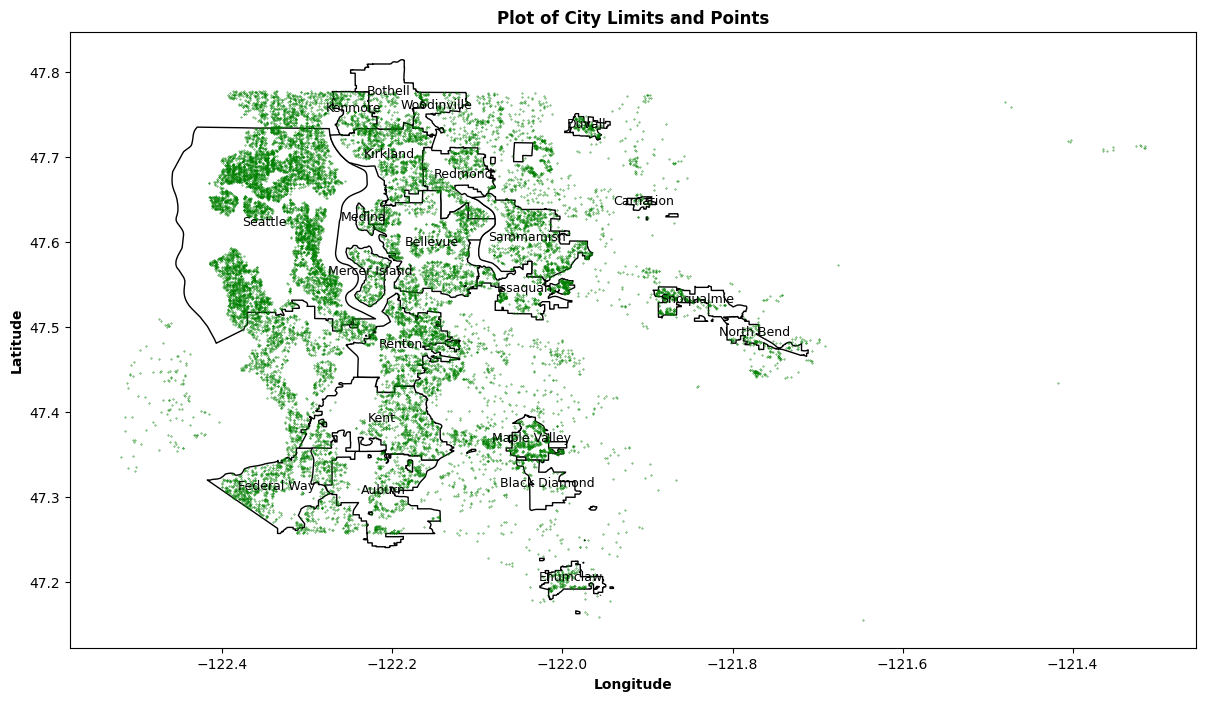

In [30]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Add the folder WA to your current working directory (this part remains unchanged)
# ...

usa = gpd.read_file(cwd+'\\WA\\WSDOT__City_Limits.shp')
gdf = gpd.GeoDataFrame(
    df_date,
    geometry=[Point(xy) for xy in zip(df_date['long'], df_date['lat'])],
)

# Plot the city boundaries and points, including city names and bold formatting
fig, ax = plt.subplots(figsize=(20, 8))  # Create a figure and axis for more control

usa[usa.CityName.isin(df_date.City.unique())].plot(
    ax=ax,
    color='white',
    edgecolor='black',
)
gdf.plot(ax=ax, color='green', marker='o', markersize=0.1)

# Add city names, customize axes, and set bold title
for idx, row in usa.iterrows():
    if row['CityName'] in df_date.City.unique():
        ax.text(row.geometry.centroid.x, row.geometry.centroid.y, row['CityName'], ha='center', fontsize=9)  # Adjust text placement and size as needed

ax.set_xlabel("Longitude", fontweight='bold')
ax.set_ylabel("Latitude", fontweight='bold')
ax.set_title("Plot of City Limits and Points", fontweight='bold')

plt.show()

In [31]:
df_date.City.value_counts()

City
Seattle          8977
Renton           1597
Bellevue         1407
Kent             1203
Redmond           979
Kirkland          977
Auburn            912
Sammamish         800
Federal Way       779
Issaquah          733
Maple Valley      590
Woodinville       471
Snoqualmie        310
Kenmore           283
Mercer Island     282
Enumclaw          234
North Bend        221
Bothell           195
Duvall            190
Carnation         124
Vashon            118
Black Diamond     100
Fall City          81
Medina             50
Name: count, dtype: int64

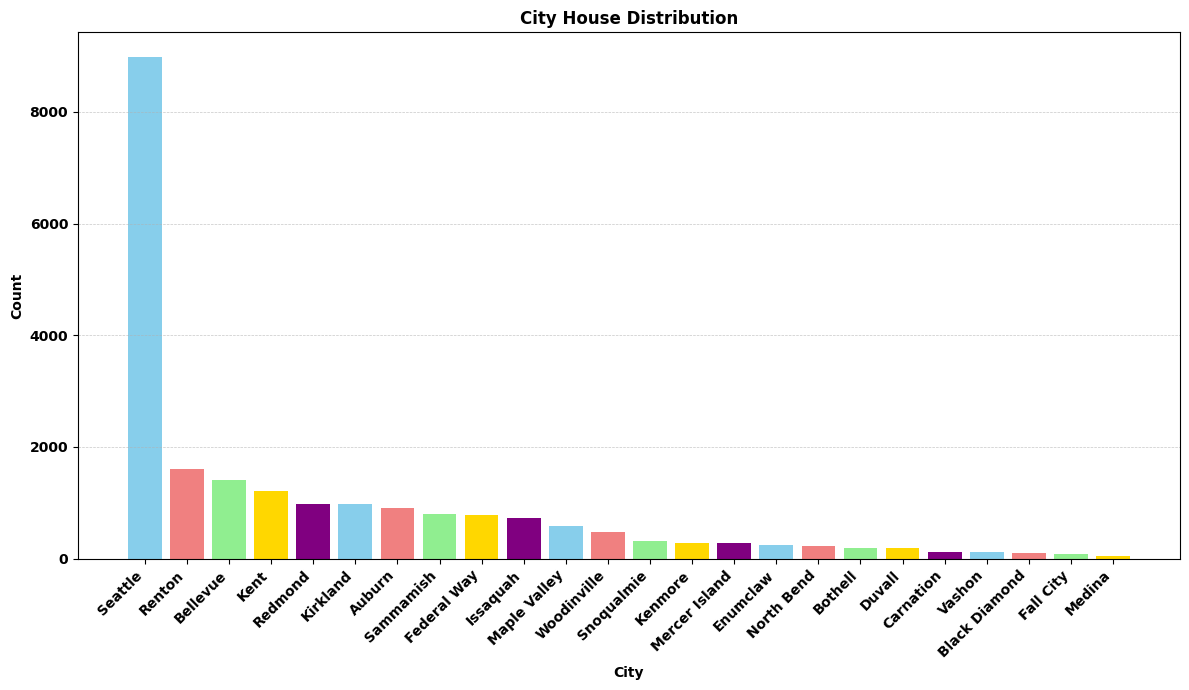

In [32]:
# Create a DataFrame
df_city = pd.DataFrame({
    "City": ["Seattle", "Renton", "Bellevue", "Kent", "Redmond", "Kirkland", "Auburn", "Sammamish", "Federal Way", "Issaquah", "Maple Valley", "Woodinville", "Snoqualmie", "Kenmore", "Mercer Island", "Enumclaw", "North Bend", "Bothell", "Duvall", "Carnation", "Vashon", "Black Diamond", "Fall City", "Medina"],
    "Count": [8977, 1597, 1407, 1203, 979, 977, 912, 800, 779, 733, 590, 471, 310, 283, 282, 234, 221, 195, 190, 124, 118, 100, 81, 50]
})

# Create a bar chart with bold formatting and colors
plt.figure(figsize=(12, 7))
bars = plt.bar(df_city["City"], df_city["Count"], color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'purple'])  # Use a color list for variety

# Customize labels and title with bold font weight
plt.xlabel("City", fontweight='bold')
plt.ylabel("Count", fontweight='bold')
plt.title("City House Distribution", fontweight='bold')

# Rotate x-axis labels for better readability and set bold font weight
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')

# Add grid lines with a bold style
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)

# Tighten the layout and display the plot
plt.tight_layout()
plt.show()

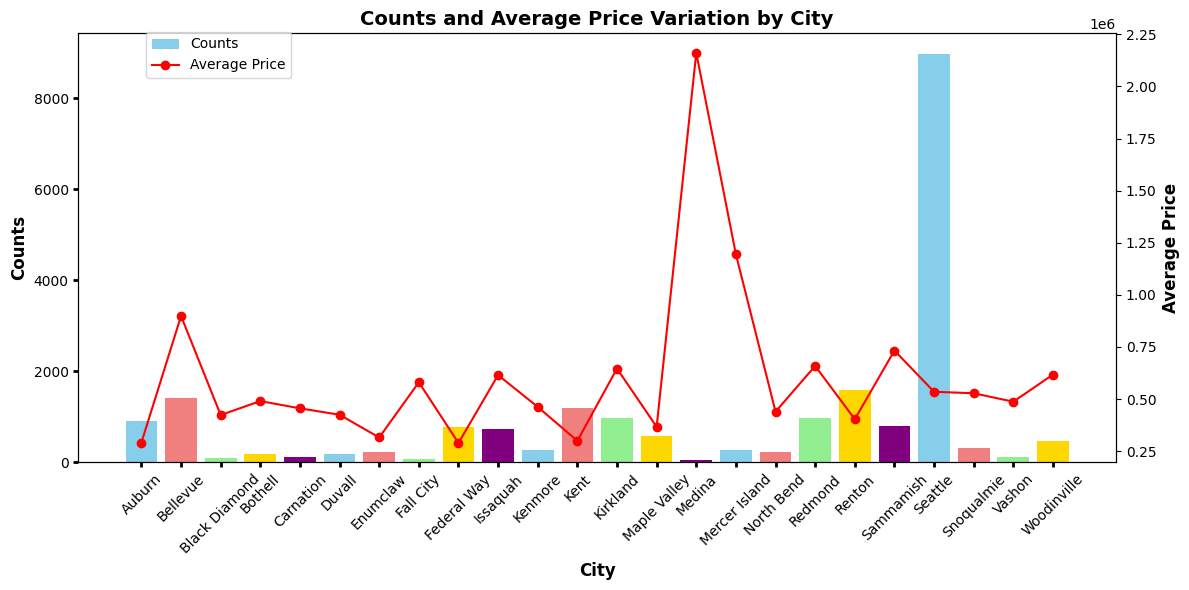

In [33]:
import matplotlib.pyplot as plt

# Calculate counts per city
counts_per_city = df_date['City'].value_counts().sort_index()

# Calculate average price per city
avg_price_per_city = df_date.groupby('City')['price'].mean().sort_index()

# Plotting
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot counts per city
color = 'skyblue'
ax1.bar(counts_per_city.index, counts_per_city, color=['skyblue', 'lightcoral', 'lightgreen', 'gold', 'purple'], label='Counts')
ax1.set_ylabel('Counts', fontsize=12, fontweight='bold', color='black')
ax1.tick_params(axis='y', labelcolor='black')

# Create a second y-axis for price
ax2 = ax1.twinx()  
color = 'orange'
ax2.plot(avg_price_per_city.index, avg_price_per_city, color='red', marker='o', label='Average Price')
ax2.set_ylabel('Average Price', fontsize=12, fontweight='bold', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Customize plot
plt.title('Counts and Average Price Variation by City', fontsize=14, fontweight='bold')
ax1.set_xlabel('City', fontsize=12, fontweight='bold')
ax1.tick_params(axis='x', labelrotation=45, labelcolor='black')
plt.xticks(rotation=45, color='black', fontweight='bold')
ax1.tick_params(axis='both', labelsize=10, width=2)

# Show legend
fig.legend(loc='upper left', bbox_to_anchor=(0.12,0.95))

# Show plot
plt.tight_layout()
plt.show()


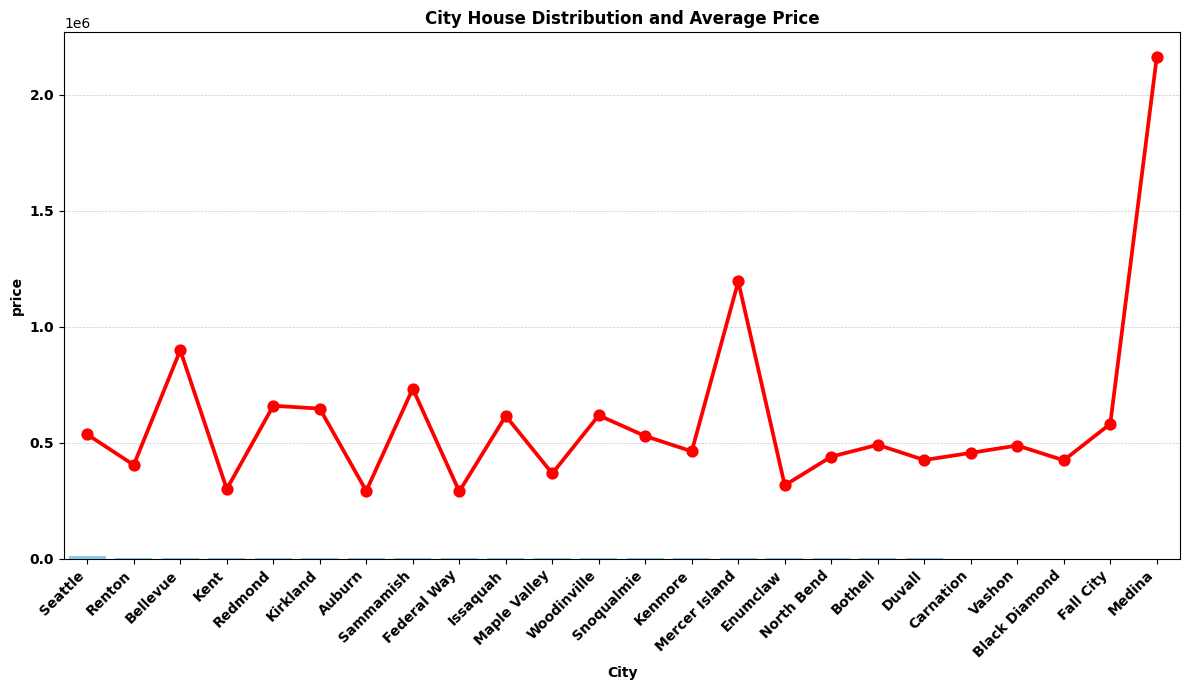

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a DataFrame for city counts
df_city = pd.DataFrame({
    "City": ["Seattle", "Renton", "Bellevue", "Kent", "Redmond", "Kirkland", "Auburn", "Sammamish", "Federal Way", "Issaquah", "Maple Valley", "Woodinville", "Snoqualmie", "Kenmore", "Mercer Island", "Enumclaw", "North Bend", "Bothell", "Duvall", "Carnation", "Vashon", "Black Diamond", "Fall City", "Medina"],
    "Count": [8977, 1597, 1407, 1203, 979, 977, 912, 800, 779, 733, 590, 471, 310, 283, 282, 234, 221, 195, 190, 124, 118, 100, 81, 50]
})

# Create a DataFrame for average price by city
df_price = df_date.groupby('City')['price'].mean().reset_index()

# Create a bar chart for city counts
plt.figure(figsize=(12, 7))
bars = plt.bar(df_city["City"], df_city["Count"], color='skyblue')

# Overlay a point plot for average price by city
sns.pointplot(x='City', y='price', data=df_price, color='red', ax=plt.gca())

# Customize labels and title with bold font weight
plt.xlabel("City", fontweight='bold')
plt.ylabel("price", fontweight='bold')
plt.title("City House Distribution and Average Price", fontweight='bold')

# Rotate x-axis labels for better readability and set bold font weight
plt.xticks(rotation=45, ha='right', fontweight='bold')
plt.yticks(fontweight='bold')

# Add grid lines with a bold style
plt.grid(axis='y', linestyle='--', alpha=0.7, linewidth=0.5)

# Show plot
plt.tight_layout()
plt.show()



In [35]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [36]:
df[['price', 'living_measure','lot_measure', 
    'ceil_measure', 'basement', 'living_measure15', 'lot_measure15','total_area']].describe().T

,count,mean,std,min,25%,50%,75%,max
price,21613.0,540182.158793,367362.231718,75000.0,321950.00,450000.0,645000.0,7700000.0
living_measure,21596.0,2079.860761,918.496121,290.0,1429.25,1910.0,2550.0,13540.0
lot_measure,21571.0,15104.583283,41423.619385,520.0,5040.00,7618.0,10684.5,1651359.0
ceil_measure,21612.0,1788.366556,828.102535,290.0,1190.00,1560.0,2210.0,9410.0
basement,21612.0,291.522534,442.580840,0.0,0.00,0.0,560.0,4820.0
living_measure15,21447.0,1987.065557,685.519629,399.0,1490.00,1840.0,2360.0,6210.0
lot_measure15,21584.0,12766.543180,27286.987107,651.0,5100.00,7620.0,10087.0,871200.0
total_area,21545.0,17192.041634,41628.688279,1423.0,7032.00,9575.0,13000.0,1652659.0


- Price varies from $ 75,000 to $7,700,000, The median (50th percentile) price is $450,000, which indicates that half of the houses have prices below this value.
- The lot measure ranges from 520 square feet to 1,651,359 square feet, showing significant variability in the sizes of lots. living_measurement, ceil_measurement, basement measurement and total area. 
this might mean there are outliers in the data.


In [37]:
num = ['price','living_measure','lot_measure',
    'ceil_measure', 'basement', 'living_measure15', 'lot_measure15','total_area','long','yr_built']
cat = ['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality','furnished','yr_built']

In [38]:
for feature in cat:
    print(df[feature].value_counts())
    print('\n')

room_bed
3.0     9767
4.0     6854
2.0     2747
5.0     1595
6.0      270
1.0      197
7.0       38
8.0       13
0.0       13
9.0        6
10.0       3
33.0       1
11.0       1
Name: count, dtype: int64


room_bath
2.50    5358
1.00    3829
1.75    3031
2.25    2039
2.00    1917
1.50    1439
2.75    1178
3.00     750
3.50     726
3.25     588
3.75     155
4.00     135
4.50     100
4.25      78
0.75      72
4.75      23
5.00      21
5.25      13
5.50      10
0.00      10
1.25       9
6.00       6
5.75       4
0.50       4
8.00       2
6.75       2
6.50       2
6.25       2
7.50       1
7.75       1
Name: count, dtype: int64


ceil
1.0    10647
2.0     8210
1.5     1905
3.0      610
2.5      161
3.5        8
Name: count, dtype: int64


coast
0.0    21421
1.0      161
Name: count, dtype: int64


sight
0.0    19437
2.0      959
3.0      510
1.0      332
4.0      318
Name: count, dtype: int64


condition
3.0    13978
4.0     5655
5.0     1694
2.0      171
1.0       30
Name: count, dtype: i

In [39]:
for i in df[num]:
    median = df[i].median()
    df[i] = df[i].fillna(median)

In [40]:
for i in df[cat]:
    df[i].fillna(df[i].mode()[0], inplace=True)

C:\Users\91994\AppData\Local\Temp\ipykernel_11424\4260729305.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[i].fillna(df[i].mode()[0], inplace=True)


In [41]:
df.isnull().sum()

cid                 0
dayhours            0
price               0
room_bed            0
room_bath           0
living_measure      0
lot_measure         0
ceil                0
coast               0
sight               0
condition           0
quality             0
ceil_measure        0
basement            0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
living_measure15    0
lot_measure15       0
furnished           0
total_area          0
dtype: int64

In [42]:
num = ['price','living_measure','lot_measure',
    'ceil_measure', 'basement', 'living_measure15', 'lot_measure15','total_area']
cat = ['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition', 'quality','furnished']

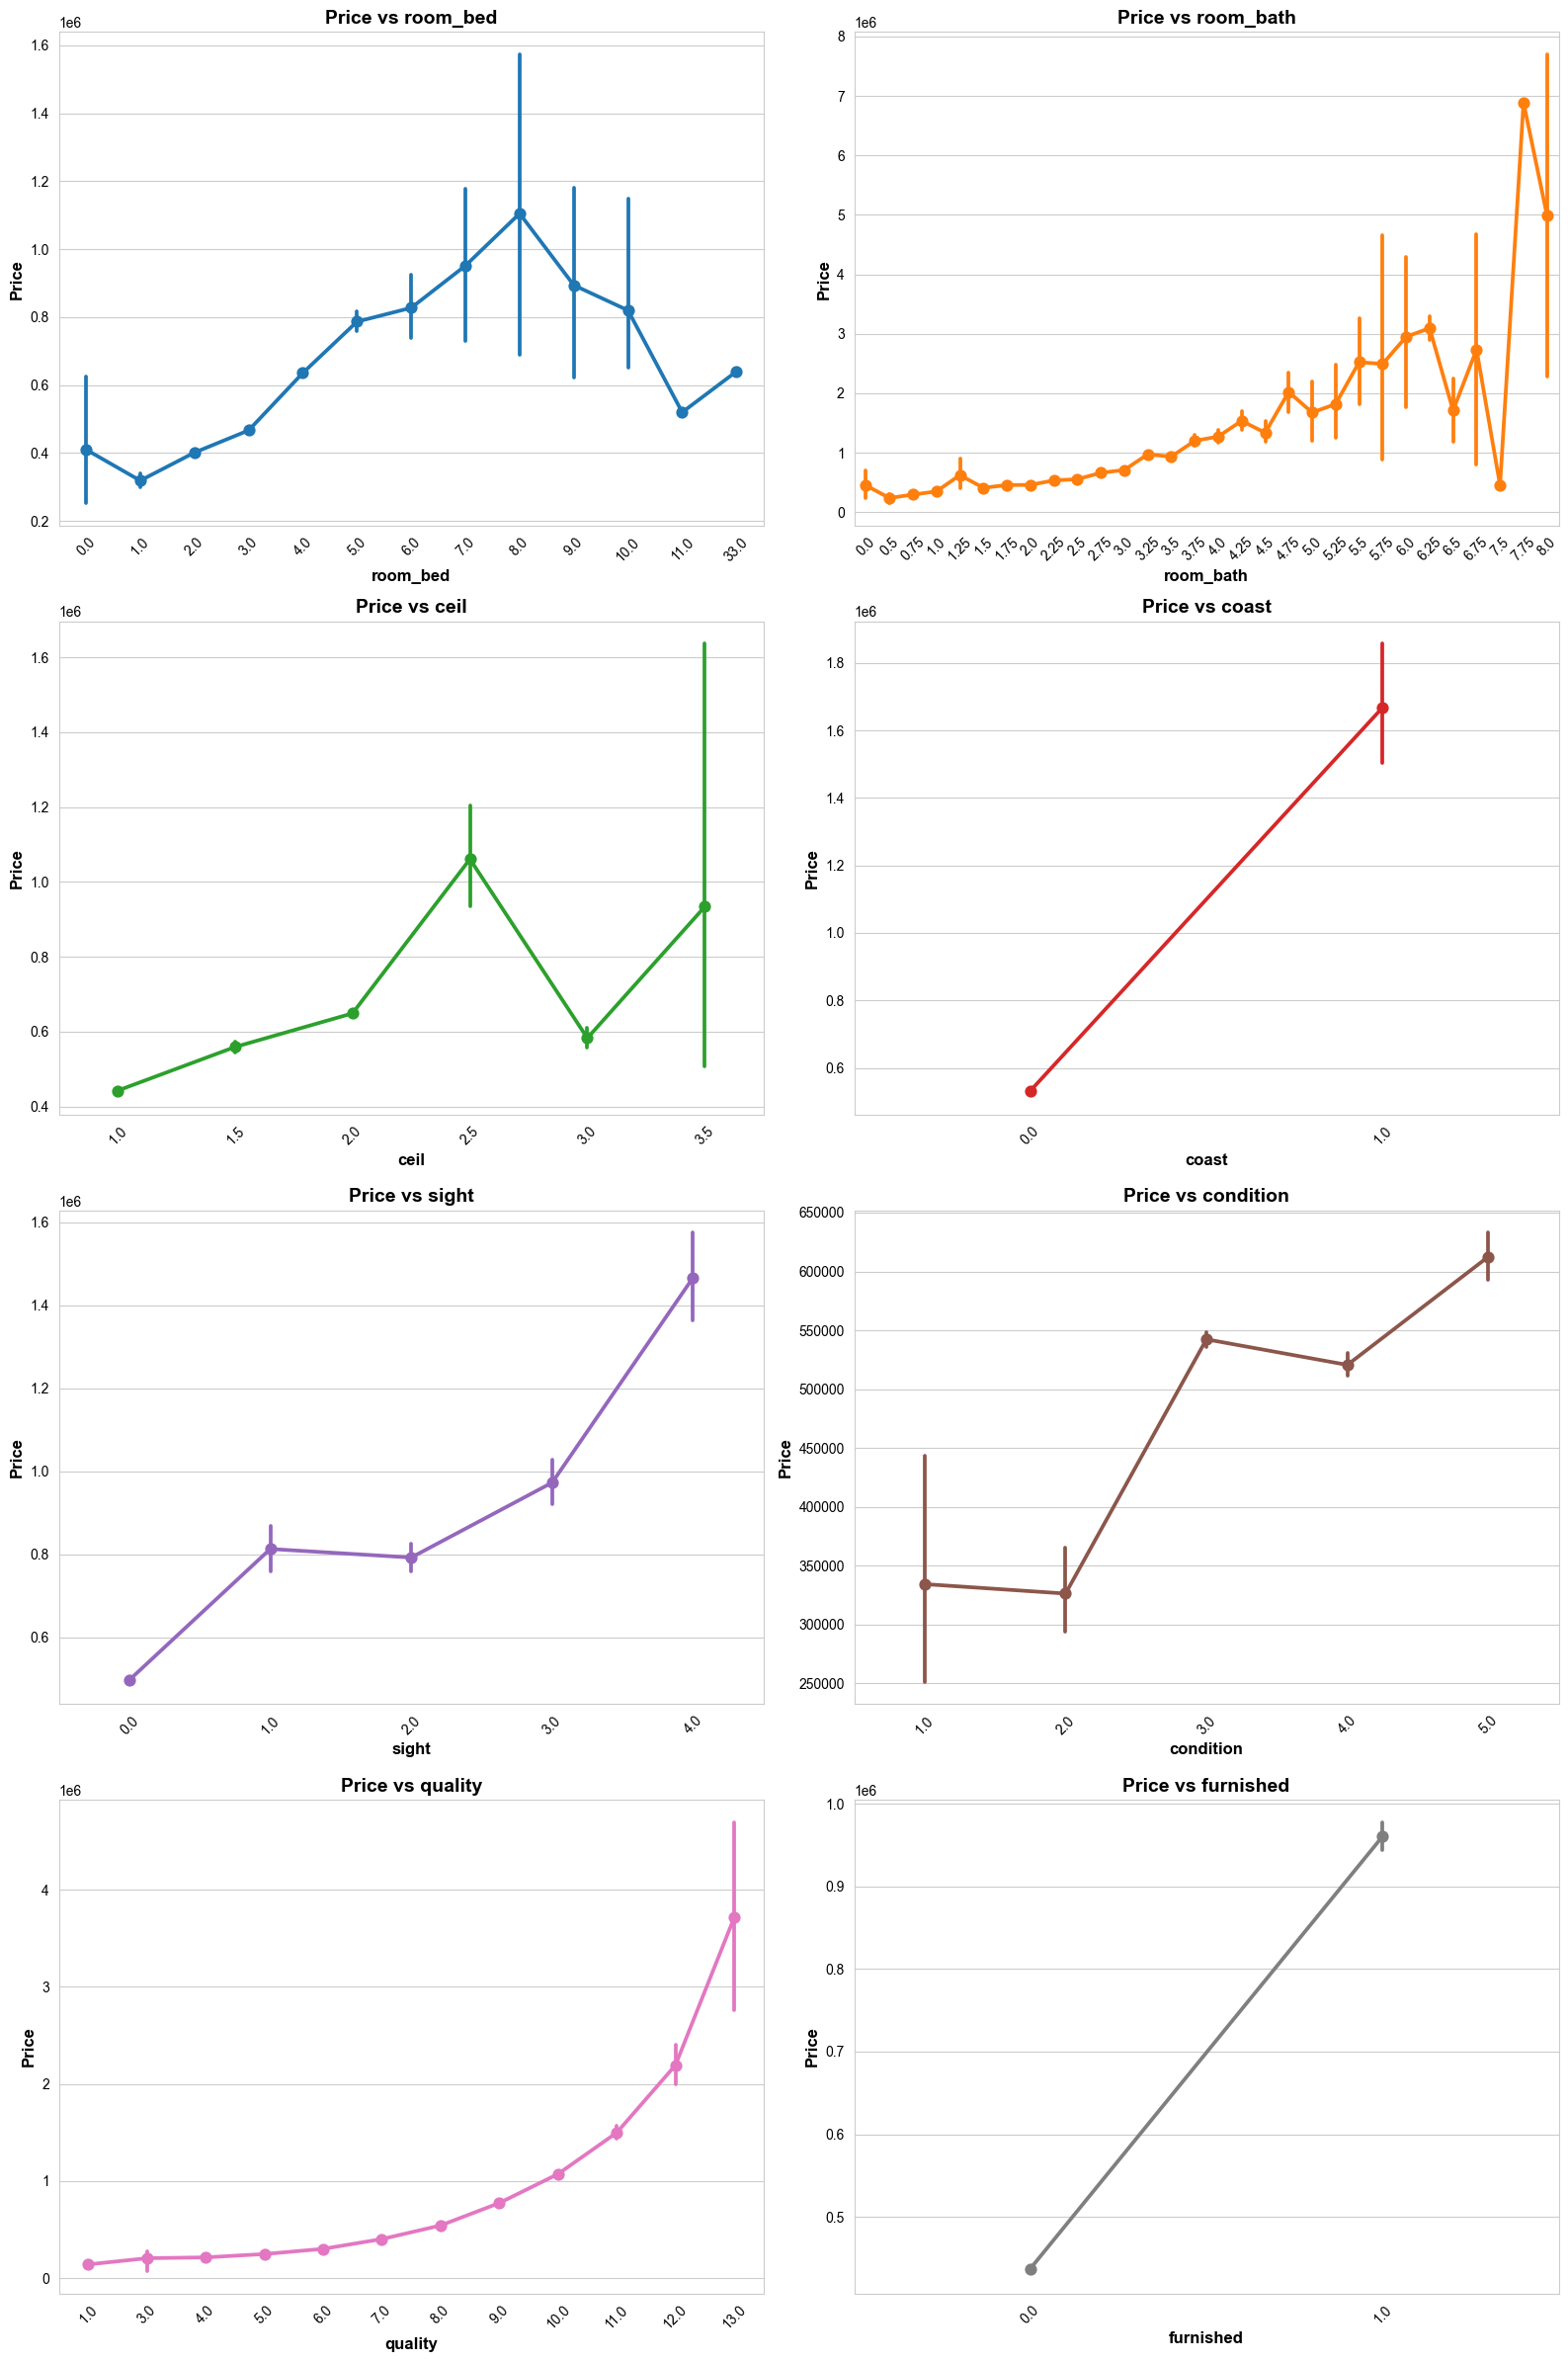

In [43]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("whitegrid")

# Set color palette
palette = sns.color_palette("tab10")

# Determine the number of plots needed
num_plots = len(cat)

# Calculate the number of rows needed for each plot
num_rows = (num_plots + 1) // 2  # Add 1 to ensure at least 1 row

# Plotting for the first four categorical variables
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 6*num_rows))

# Loop through each categorical variable and create plots
for i, var in enumerate(cat):
    row = i // 2
    col = i % 2
    
    # Create point plot
    sns.pointplot(x=var, y='price', data=df, ax=axes[row, col], color=palette[i % len(palette)])
    
    # Set x-axis label
    axes[row, col].set_xlabel(var, fontsize=12, fontweight='bold', color='black')
    
    # Set y-axis label
    axes[row, col].set_ylabel('Price', fontsize=12, fontweight='bold', color='black')
    
    # Set title
    axes[row, col].set_title(f'Price vs {var}', fontsize=14, fontweight='bold', color='black')
    
    # Rotate x ticks
    axes[row, col].tick_params(axis='x', labelrotation=45, colors='black', labelsize=10, width=2)
    axes[row, col].tick_params(axis='y', colors='black', labelsize=10, width=2)

# Remove empty subplots if the number of categorical variables is odd
if num_plots % 2 != 0:
    fig.delaxes(axes[num_rows-1, num_plots % 2])

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


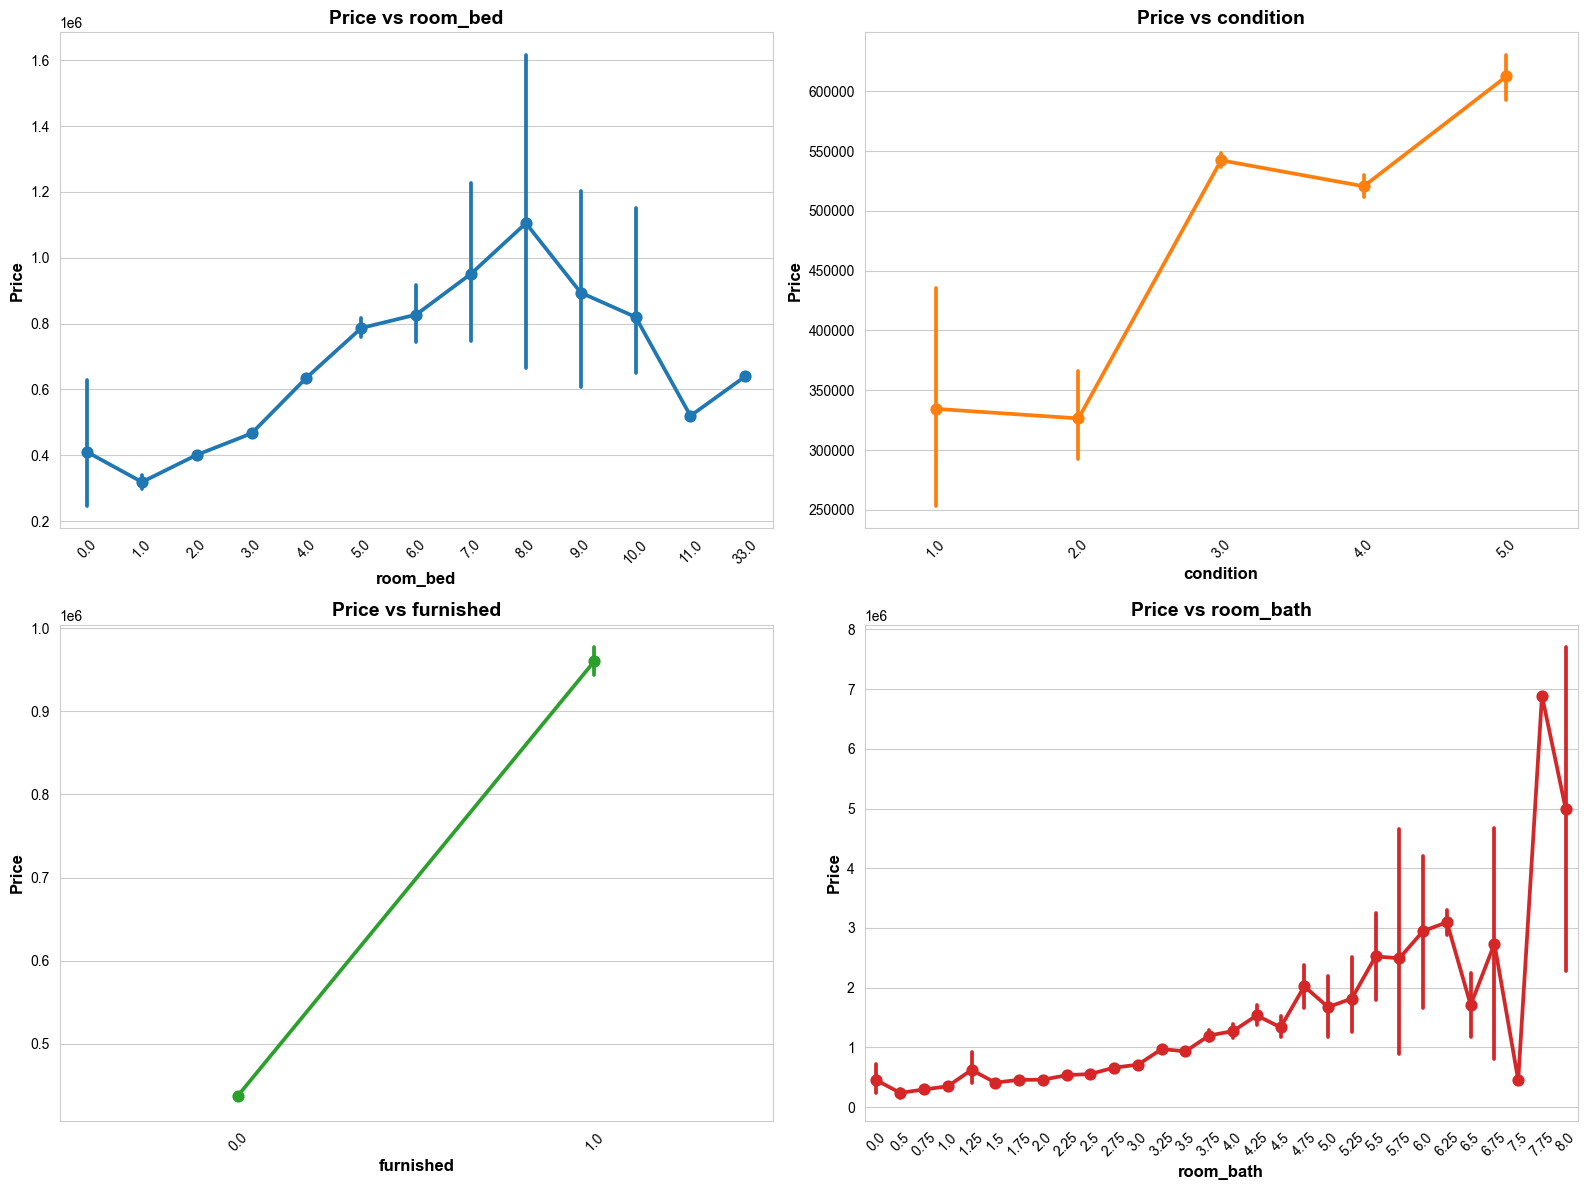

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set seaborn style
sns.set_style("whitegrid")

# Set color palette
palette = sns.color_palette("tab10")

# Selected categorical variables
selected_cat = ['room_bed', 'condition', 'furnished', 'room_bath']

# Plotting for the selected categorical variables
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

# Loop through each selected categorical variable and create plots
for i, var in enumerate(selected_cat):
    row = i // 2
    col = i % 2
    
    # Create point plot
    sns.pointplot(x=var, y='price', data=df, ax=axes[row, col], color=palette[i % len(palette)])
    
    # Set x-axis label
    axes[row, col].set_xlabel(var, fontsize=12, fontweight='bold', color='black')
    
    # Set y-axis label
    axes[row, col].set_ylabel('Price', fontsize=12, fontweight='bold', color='black')
    
    # Set title
    axes[row, col].set_title(f'Price vs {var}', fontsize=14, fontweight='bold', color='black')
    
    # Rotate x ticks
    axes[row, col].tick_params(axis='x', labelrotation=45, colors='black', labelsize=10, width=2)
    axes[row, col].tick_params(axis='y', colors='black', labelsize=10, width=2)

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()


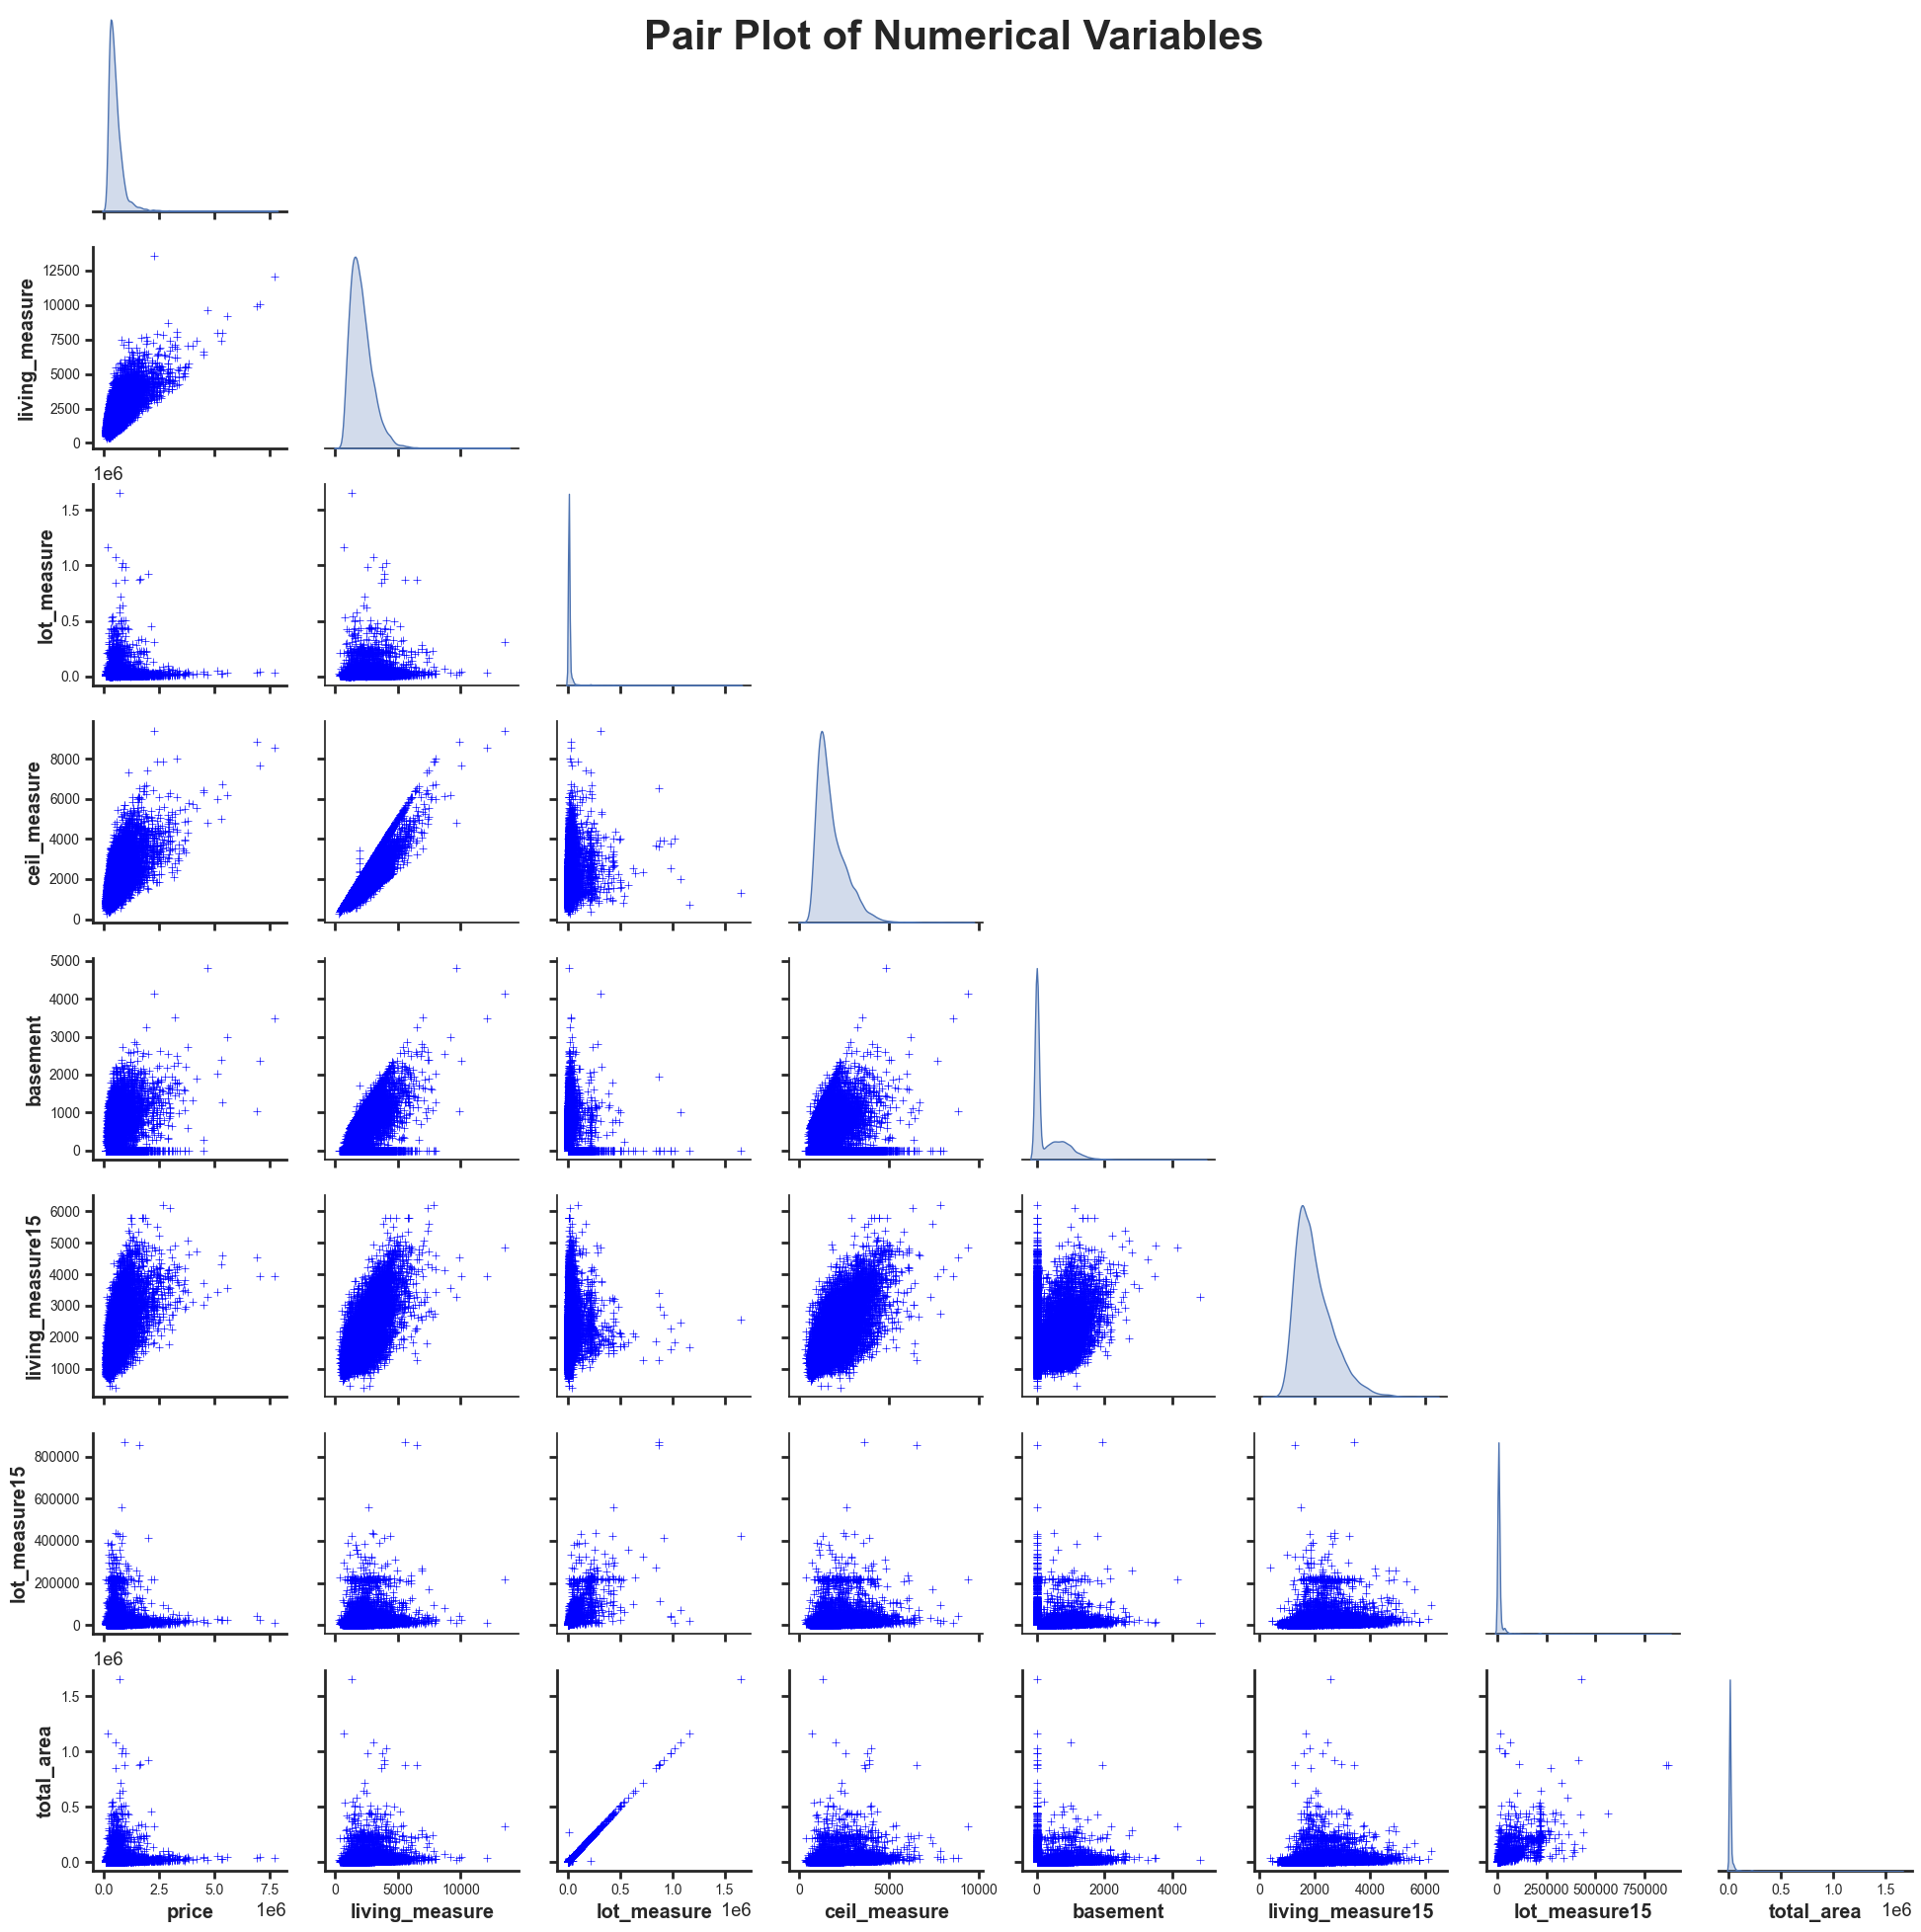

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="ticks", font_scale=1.2)

# Selected numerical variables
selected_num = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 
                'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Create pair plot with scatter plots on off-diagonal and KDE plots on diagonal
g = sns.pairplot(df[selected_num], diag_kind='kde', plot_kws={'color':'blue'}, markers='+', corner='lower')

# Set thick axes and ticks
for ax in g.axes[:, 0]:
    if ax:
        ax.set_ylabel(ax.get_ylabel(), fontweight='bold')
        ax.spines['left'].set_linewidth(2)
        ax.spines['bottom'].set_linewidth(2)
for ax in g.axes[-1, :]:
    if ax:
        ax.set_xlabel(ax.get_xlabel(), fontweight='bold')
        ax.spines['bottom'].set_linewidth(2)
        ax.spines['left'].set_linewidth(2)
for ax in g.axes.flatten():
    if ax:
        ax.tick_params(axis='both', which='major', labelsize=10, width=2)

# Add title
plt.suptitle('Pair Plot of Numerical Variables', fontsize=30, fontweight='bold')

# Show plot
plt.show()




c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


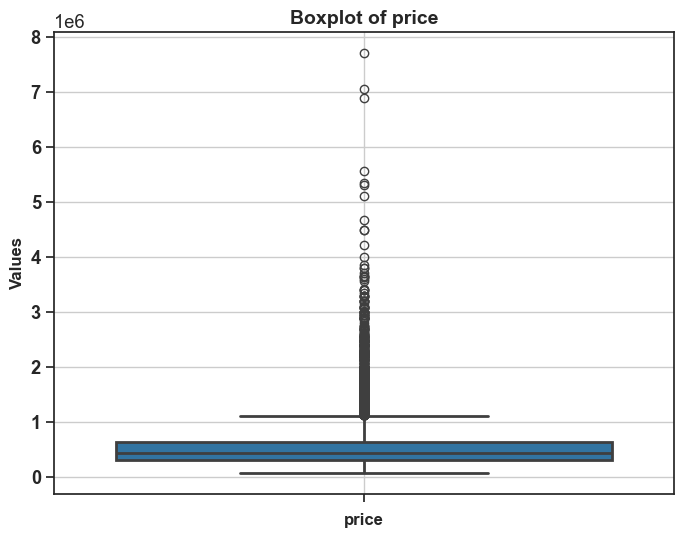

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


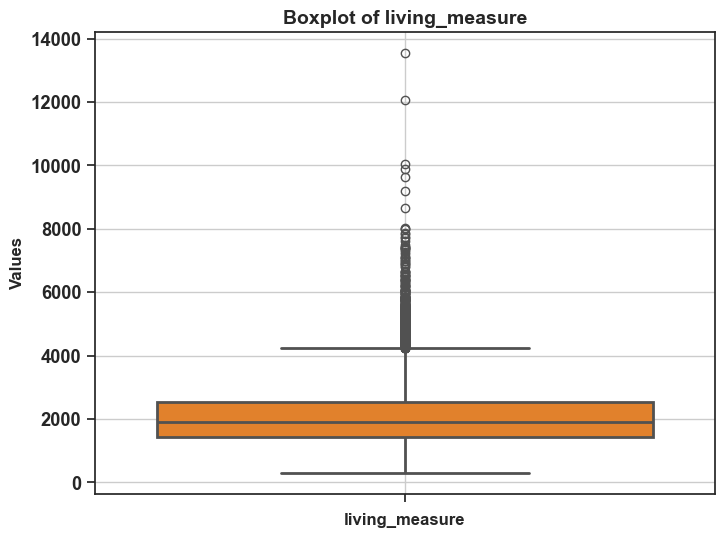

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


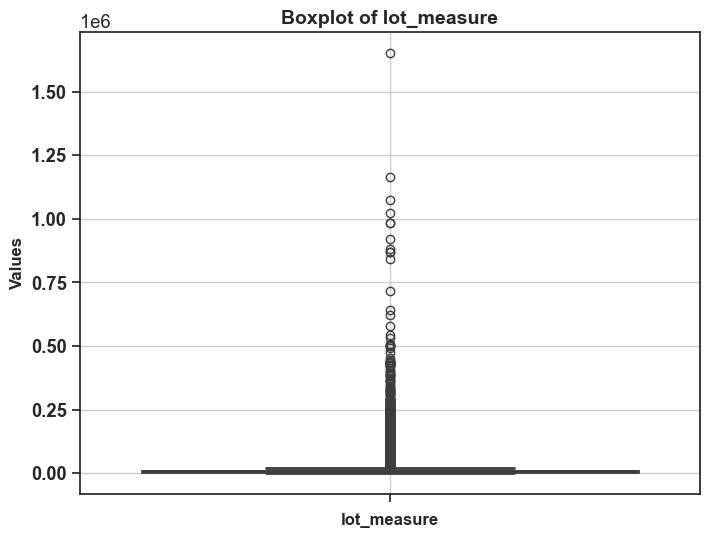

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


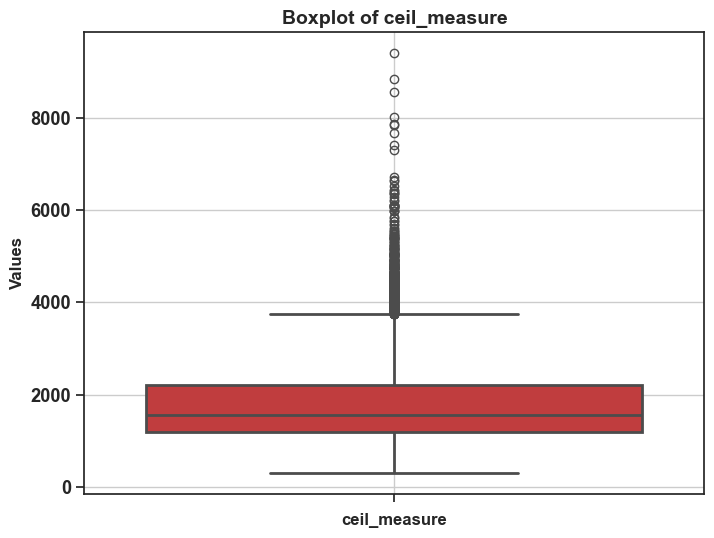

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


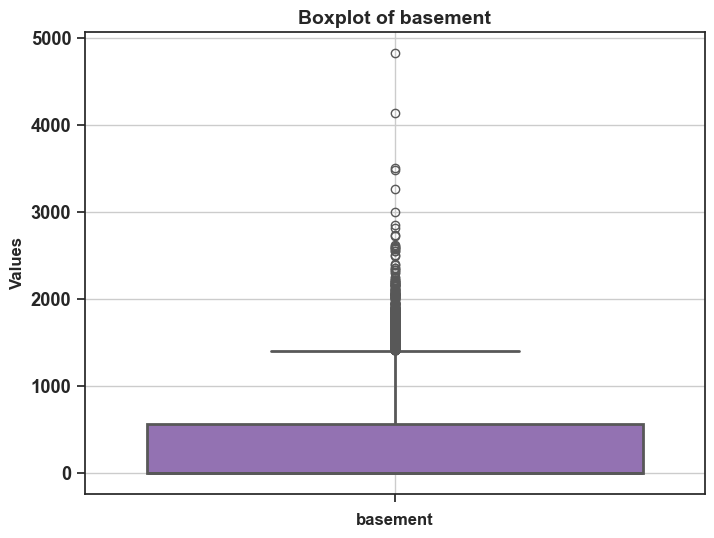

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


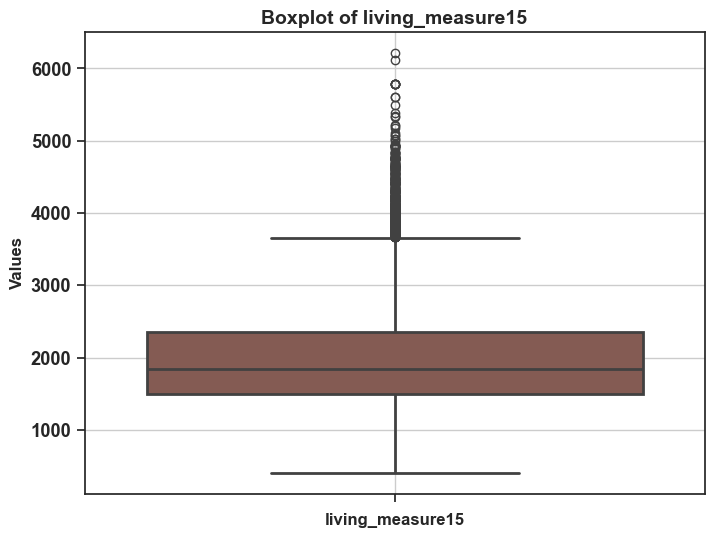

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


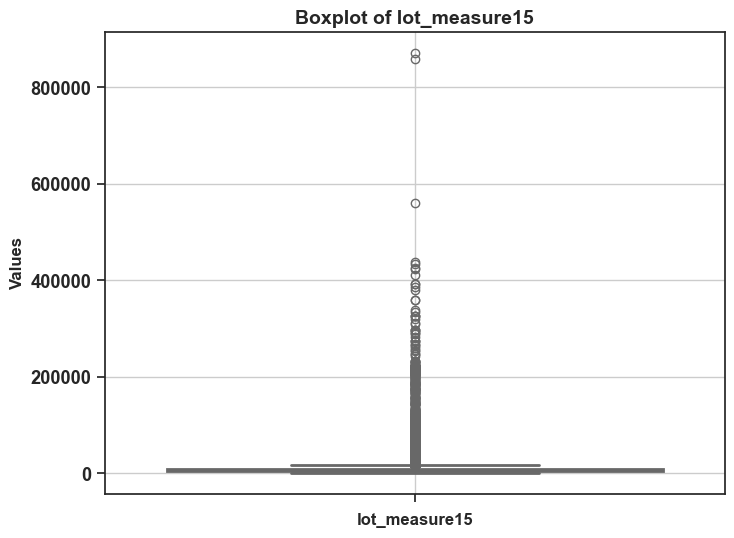

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


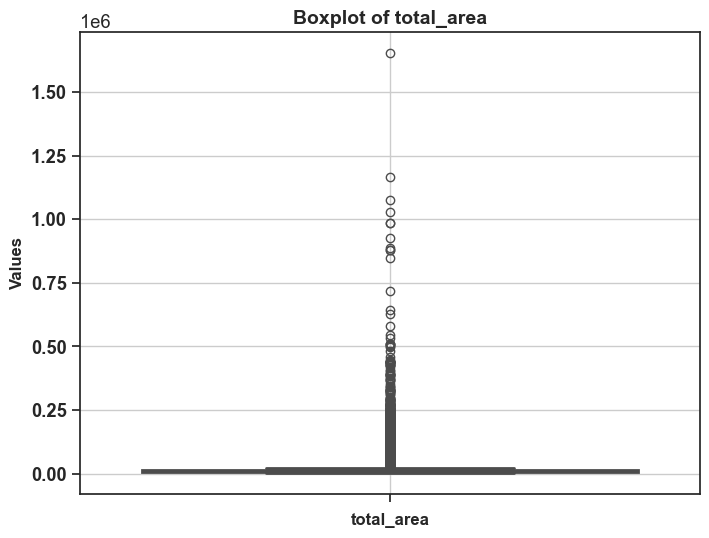

In [46]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="ticks", font_scale=1.2)

# Selected numerical variables
selected_num = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 
                'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Define custom colors for boxplots
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Create boxplots for each numerical variable
for i, var in enumerate(selected_num):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[var], color=custom_colors[i], linewidth=2)
    plt.xlabel(var, fontsize=12, fontweight='bold')
    plt.ylabel('Values', fontsize=12, fontweight='bold')
    plt.title(f'Boxplot of {var}', fontsize=14, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.grid(True)
    
    # Show plot
    plt.show()



In [47]:
df.head().T

,0,1,2,3,4
cid,3876100940,3145600250,7129303070,7338220280,7950300670
dayhours,2015-04-27 00:00:00,2015-03-17 00:00:00,2014-08-20 00:00:00,2014-10-10 00:00:00,2015-02-18 00:00:00
price,600000,190000,735000,257000,450000
room_bed,4.0,2.0,4.0,3.0,2.0
room_bath,1.75,1.0,2.75,2.5,1.0
living_measure,3050.0,670.0,3040.0,1740.0,1120.0
lot_measure,9440.0,3101.0,2415.0,3721.0,4590.0
ceil,1.0,1.0,2.0,2.0,1.0
coast,0.0,0.0,1.0,0.0,0.0
sight,0.0,0.0,4.0,0.0,0.0


In [48]:
Q1 = df[num].quantile(0.25)
Q3 = df[num].quantile(0.75)
IQR = Q3 - Q1
UL = Q3 + 1.5*IQR
LL = Q1 - 1.5*IQR
LL[LL < 0] = 0

In [49]:
LL

price                 0.0
living_measure        0.0
lot_measure           0.0
ceil_measure          0.0
basement              0.0
living_measure15    185.0
lot_measure15         0.0
total_area            0.0
dtype: float64

In [50]:
UL

price               1129575.0
living_measure         4230.0
lot_measure           19085.5
ceil_measure           3740.0
basement               1400.0
living_measure15       3665.0
lot_measure15         17550.0
total_area            21865.0
dtype: float64

In [51]:
# Count outliers for each variable
outliers_count = (df[num] < LL) | (df[num] > UL)
outliers_count = outliers_count.sum()
print("Number of outliers for each variable:")
print(outliers_count)

Number of outliers for each variable:
price               1159
living_measure       572
lot_measure         2426
ceil_measure         611
basement             496
living_measure15     540
lot_measure15       2192
total_area          2418
dtype: int64


In [52]:
def treat_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [53]:
for feature in df[num]: 
    lr,ur=treat_outlier(df[feature])
    df[feature]=np.where(df[feature]>ur,ur,df[feature])
    df[feature]=np.where(df[feature]<lr,lr,df[feature])

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


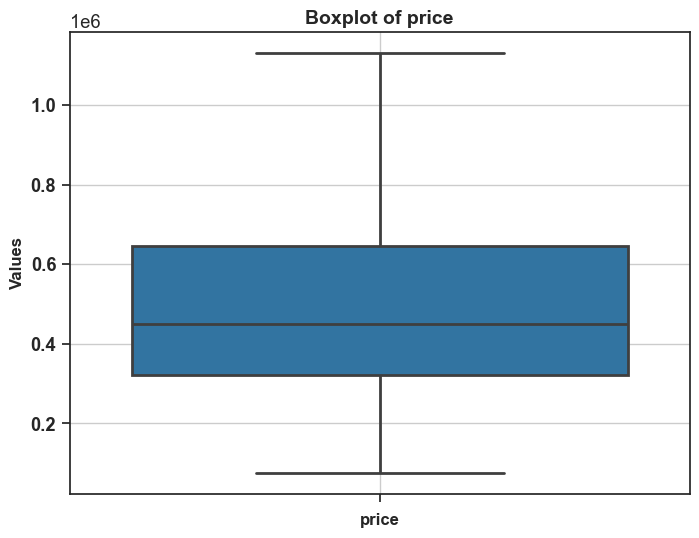

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


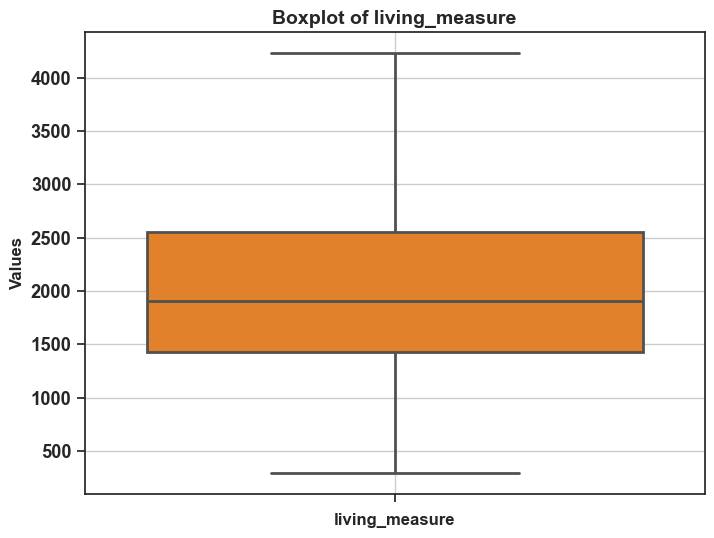

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


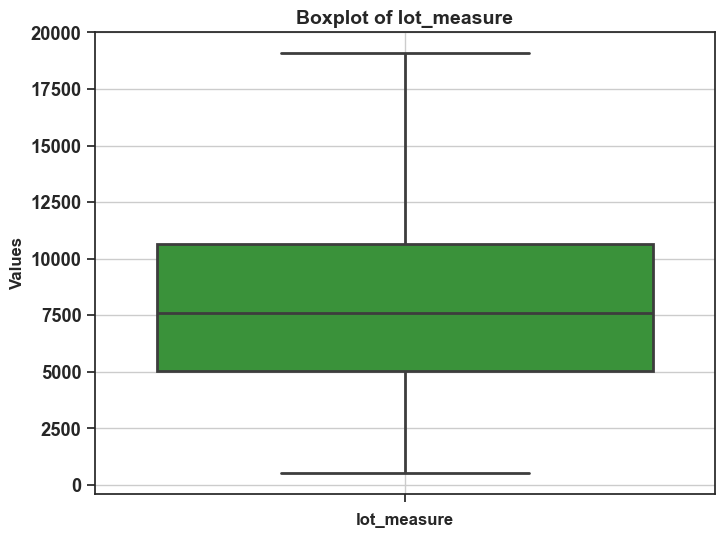

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


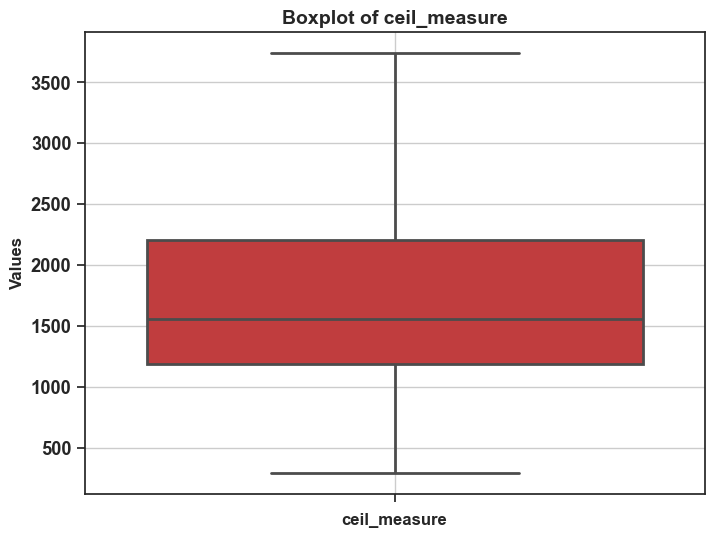

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


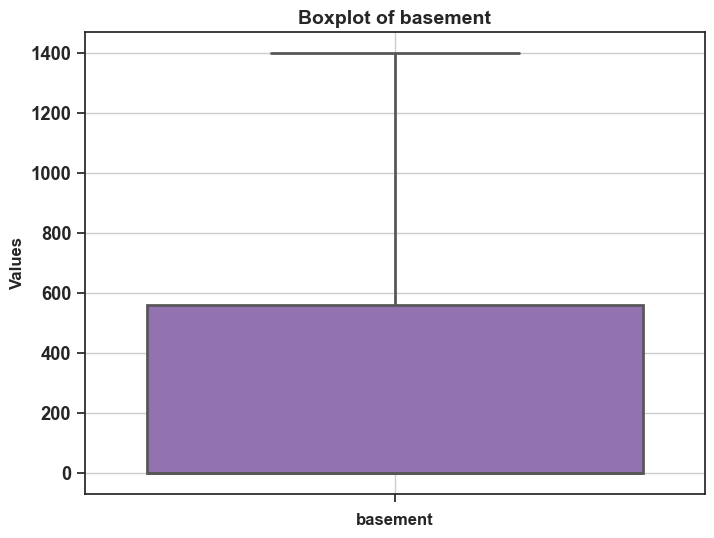

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


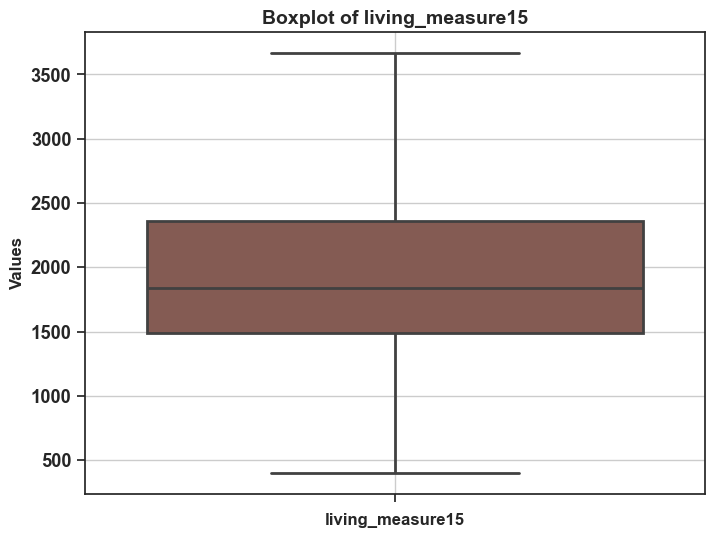

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


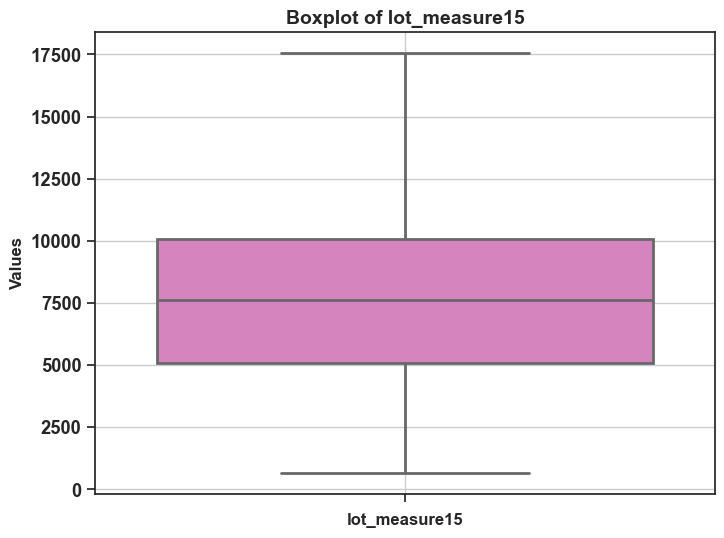

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:632: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


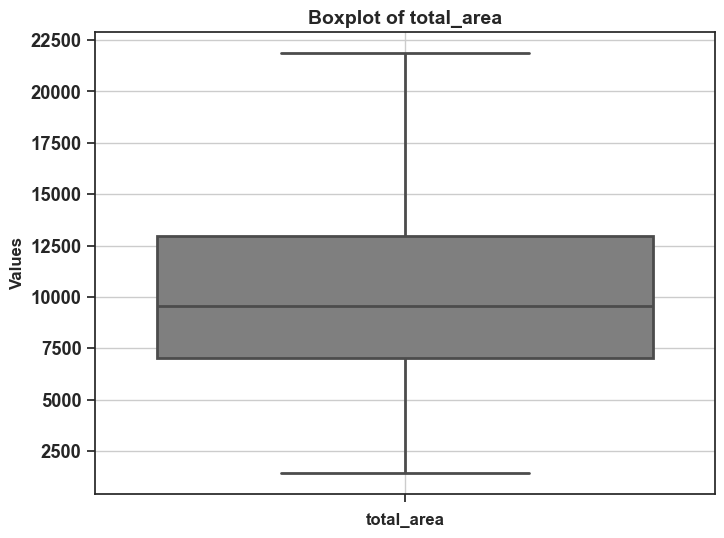

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn style
sns.set(style="ticks", font_scale=1.2)

# Selected numerical variables
selected_num = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 
                'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Define custom colors for boxplots
custom_colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']

# Create boxplots for each numerical variable
for i, var in enumerate(selected_num):
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[var], color=custom_colors[i], linewidth=2)
    plt.xlabel(var, fontsize=12, fontweight='bold')
    plt.ylabel('Values', fontsize=12, fontweight='bold')
    plt.title(f'Boxplot of {var}', fontsize=14, fontweight='bold')
    plt.xticks(fontweight='bold')
    plt.yticks(fontweight='bold')
    plt.grid(True)
    
    # Show plot
    plt.show()

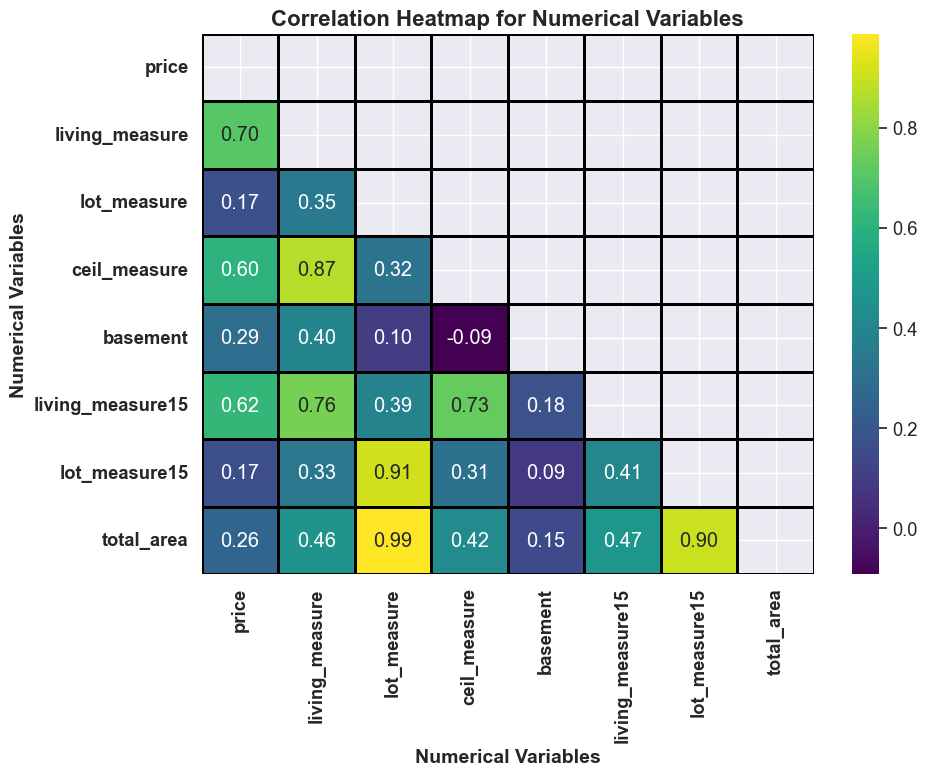

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Selecting numerical variables
numerical_variables = ['price', 'living_measure', 'lot_measure', 'ceil_measure', 
                       'basement', 'living_measure15', 'lot_measure15', 'total_area']

# Calculating correlation matrix
correlation_matrix = df[numerical_variables].corr()

# Mask to hide the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set Seaborn style
sns.set(font_scale=1.2)

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, mask=mask, cmap='viridis', linewidths=2, linecolor='black', annot=True, fmt=".2f")
plt.title('Correlation Heatmap for Numerical Variables', fontsize=16, fontweight='bold')
plt.xlabel('Numerical Variables', fontsize=14, fontweight='bold')
plt.ylabel('Numerical Variables', fontsize=14, fontweight='bold')
plt.xticks(fontweight='bold')
plt.yticks(fontweight='bold')
plt.tight_layout()

# Show plot
plt.show()


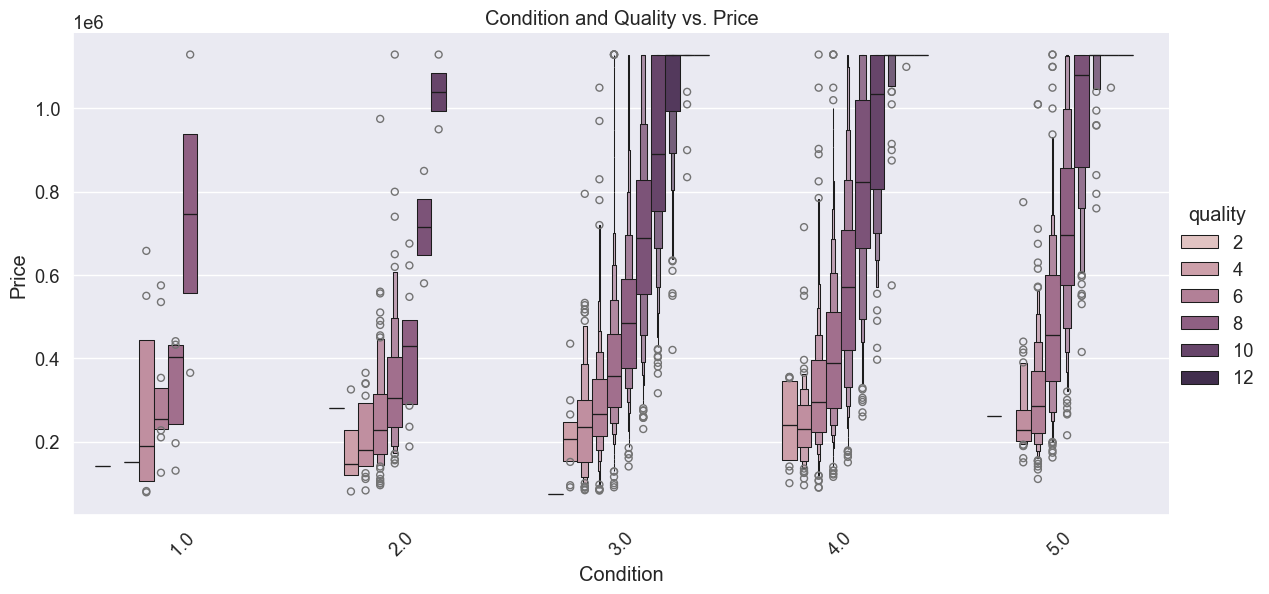

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

# Specify the two categorical variables you want to plot
cat1 = 'condition'
cat2 = 'quality'

# Create a categorical plot with hue
sns.catplot(x=cat1, y='price', hue=cat2, data=df, kind='boxen', height=6, aspect=2)
plt.title(f'{cat1.capitalize()} and {cat2.capitalize()} vs. Price')
plt.xlabel(f'{cat1.capitalize()}')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()


In [57]:
df.head()

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,basement,yr_built,yr_renovated,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area
0,3876100940,2015-04-27,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,...,1250.0,1966.0,0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490.0
1,3145600250,2015-03-17,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,...,0.0,1948.0,0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771.0
2,7129303070,2014-08-20,735000.0,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,...,0.0,1966.0,0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455.0
3,7338220280,2014-10-10,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,...,0.0,2009.0,0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461.0
4,7950300670,2015-02-18,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,...,0.0,1924.0,0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710.0


In [58]:
df.columns

Index(['cid', 'dayhours', 'price', 'room_bed', 'room_bath', 'living_measure',
       'lot_measure', 'ceil', 'coast', 'sight', 'condition', 'quality',
       'ceil_measure', 'basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'living_measure15', 'lot_measure15', 'furnished',
       'total_area'],
      dtype='object')

In [59]:
df.shape

(21613, 23)

In [60]:
import datetime

# Current year
current_year = datetime.datetime.now().year

# Function to calculate age of house
def calculate_house_age(row):
    if row['yr_renovated'] != 0:
        return current_year - row['yr_renovated']
    else:
        return current_year - row['yr_built']

# Apply the function to create a new column 'house_age'
df['house_age'] = df.apply(calculate_house_age, axis=1)

# Drop 'yr_built' and 'yr_renovated' columns
df.drop(['yr_built', 'yr_renovated'], axis=1, inplace=True)


In [61]:
df

,cid,dayhours,price,room_bed,room_bath,living_measure,lot_measure,ceil,coast,sight,...,ceil_measure,basement,zipcode,lat,long,living_measure15,lot_measure15,furnished,total_area,house_age
0,3876100940,2015-04-27,600000.0,4.0,1.75,3050.0,9440.0,1.0,0.0,0.0,...,1800.0,1250.0,98034,47.7228,-122.183,2020.0,8660.0,0.0,12490.0,58.0
1,3145600250,2015-03-17,190000.0,2.0,1.00,670.0,3101.0,1.0,0.0,0.0,...,670.0,0.0,98118,47.5546,-122.274,1660.0,4100.0,0.0,3771.0,76.0
2,7129303070,2014-08-20,735000.0,4.0,2.75,3040.0,2415.0,2.0,1.0,4.0,...,3040.0,0.0,98118,47.5188,-122.256,2620.0,2433.0,0.0,5455.0,58.0
3,7338220280,2014-10-10,257000.0,3.0,2.50,1740.0,3721.0,2.0,0.0,0.0,...,1740.0,0.0,98002,47.3363,-122.213,2030.0,3794.0,0.0,5461.0,15.0
4,7950300670,2015-02-18,450000.0,2.0,1.00,1120.0,4590.0,1.0,0.0,0.0,...,1120.0,0.0,98118,47.5663,-122.285,1120.0,5100.0,0.0,5710.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,203600600,2015-03-10,685530.0,4.0,2.50,3130.0,19085.5,2.0,0.0,0.0,...,3130.0,0.0,98014,47.6618,-121.962,2780.0,17550.0,1.0,21865.0,28.0
21609,625049281,2014-05-21,535000.0,2.0,1.00,1030.0,4841.0,1.0,0.0,0.0,...,920.0,110.0,98103,47.6860,-122.341,1530.0,4944.0,0.0,5871.0,85.0
21610,424069018,2014-09-05,998000.0,3.0,3.75,3710.0,19085.5,2.0,0.0,0.0,...,2910.0,800.0,98075,47.5888,-122.040,2390.0,17550.0,1.0,21865.0,46.0
21611,7258200055,2015-02-06,262000.0,4.0,2.50,1560.0,7800.0,2.0,0.0,0.0,...,1560.0,0.0,98168,47.5140,-122.316,1160.0,7800.0,0.0,9360.0,27.0


In [62]:
df.drop(['cid', 'dayhours','living_measure', 'lot_measure', 'zipcode','lat', 'long'], axis = 1, inplace=True)

In [63]:
df

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,house_age
0,600000.0,4.0,1.75,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,2020.0,8660.0,0.0,12490.0,58.0
1,190000.0,2.0,1.00,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1660.0,4100.0,0.0,3771.0,76.0
2,735000.0,4.0,2.75,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,2620.0,2433.0,0.0,5455.0,58.0
3,257000.0,3.0,2.50,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2030.0,3794.0,0.0,5461.0,15.0
4,450000.0,2.0,1.00,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1120.0,5100.0,0.0,5710.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,685530.0,4.0,2.50,2.0,0.0,0.0,3.0,9.0,3130.0,0.0,2780.0,17550.0,1.0,21865.0,28.0
21609,535000.0,2.0,1.00,1.0,0.0,0.0,3.0,7.0,920.0,110.0,1530.0,4944.0,0.0,5871.0,85.0
21610,998000.0,3.0,3.75,2.0,0.0,0.0,3.0,10.0,2910.0,800.0,2390.0,17550.0,1.0,21865.0,46.0
21611,262000.0,4.0,2.50,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1160.0,7800.0,0.0,9360.0,27.0


### Scaling

In [64]:
sc = StandardScaler()
scaled_df = pd.DataFrame(sc.fit_transform(df.iloc[:,0:15]),columns=df.columns[0:])
scaled_df.head().T

,0,1,2,3,4
price,0.353510,-1.286213,0.893419,-1.018259,-0.246389
room_bed,0.679192,-1.475263,0.679192,-0.398035,-1.475263
room_bath,-0.477500,-1.453069,0.823258,0.498068,-1.453069
ceil,-0.912424,-0.912424,0.940284,0.940284,-0.912424
coast,-0.086632,-0.086632,11.543060,-0.086632,-0.086632
sight,-0.305352,-0.305352,4.919970,-0.305352,-0.305352
condition,-0.627337,0.911318,-0.627337,-0.627337,-0.627337
quality,0.291953,-1.409540,0.291953,0.291953,-0.558793
ceil_measure,0.039884,-1.439165,1.662912,-0.038649,-0.850163
basement,2.316122,-0.681086,-0.681086,-0.681086,-0.681086


### Clustering Using K-Means Clustering

In [86]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters = 3,random_state=1)
k_means.fit(scaled_df)
k_means.labels_

array([1, 1, 0, ..., 0, 2, 0])

In [87]:
k_means.inertia_

210562.3182716937

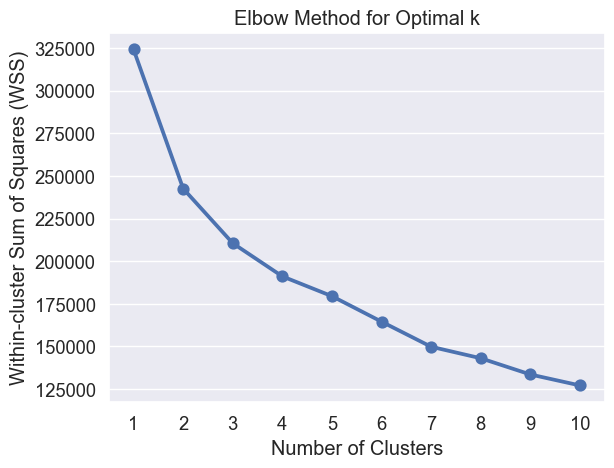

In [88]:
import seaborn as sns
import matplotlib.pyplot as plt

# Your code for calculating inertia
wss = []
for i in range(1, 11):
    KM = KMeans(n_clusters=i, random_state=1)
    KM.fit(scaled_df)
    wss.append(KM.inertia_)

# Create a list of x-values (1 to 10)
a = list(range(1, 11))

# Plot the results using pointplot
sns.pointplot(x=a, y=wss)
plt.xlabel('Number of Clusters')
plt.ylabel('Within-cluster Sum of Squares (WSS)')
plt.title('Elbow Method for Optimal k')
plt.show()

In [89]:
k_means = KMeans(n_clusters = 2,random_state=1)
k_means.fit(scaled_df)
labels = k_means.labels_

In [90]:
from sklearn.metrics import silhouette_score
silhouette_score(scaled_df,labels,random_state=1)

0.31890757172250117

In [91]:
df_cluster = df.copy()

In [92]:
df_cluster

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,house_age
0,600000.0,4.0,1.75,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,2020.0,8660.0,0.0,12490.0,58.0
1,190000.0,2.0,1.00,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1660.0,4100.0,0.0,3771.0,76.0
2,735000.0,4.0,2.75,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,2620.0,2433.0,0.0,5455.0,58.0
3,257000.0,3.0,2.50,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2030.0,3794.0,0.0,5461.0,15.0
4,450000.0,2.0,1.00,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1120.0,5100.0,0.0,5710.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,685530.0,4.0,2.50,2.0,0.0,0.0,3.0,9.0,3130.0,0.0,2780.0,17550.0,1.0,21865.0,28.0
21609,535000.0,2.0,1.00,1.0,0.0,0.0,3.0,7.0,920.0,110.0,1530.0,4944.0,0.0,5871.0,85.0
21610,998000.0,3.0,3.75,2.0,0.0,0.0,3.0,10.0,2910.0,800.0,2390.0,17550.0,1.0,21865.0,46.0
21611,262000.0,4.0,2.50,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1160.0,7800.0,0.0,9360.0,27.0


In [93]:
df_cluster["Clus_kmeans"] = labels
df_cluster.head()

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,house_age,Clus_kmeans
0,600000.0,4.0,1.75,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,2020.0,8660.0,0.0,12490.0,58.0,1
1,190000.0,2.0,1.00,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1660.0,4100.0,0.0,3771.0,76.0,1
2,735000.0,4.0,2.75,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,2620.0,2433.0,0.0,5455.0,58.0,0
3,257000.0,3.0,2.50,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2030.0,3794.0,0.0,5461.0,15.0,1
4,450000.0,2.0,1.00,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1120.0,5100.0,0.0,5710.0,100.0,1


In [94]:
df_cluster.Clus_kmeans.value_counts().sort_index()

Clus_kmeans
0     5384
1    16229
Name: count, dtype: int64

In [95]:
clust_profile=df_cluster.groupby('Clus_kmeans').mean()
clust_profile['freq']=df_cluster.Clus_kmeans.value_counts().sort_index()
clust_profile.T

Clus_kmeans,0,1
price,795302.170134,417491.375870
room_bed,3.950223,3.176844
room_bath,2.852990,1.872959
ceil,1.852062,1.373190
coast,0.025260,0.001540
sight,0.594168,0.114178
condition,3.264302,3.455296
quality,9.164933,7.156510
ceil_measure,2754.259844,1442.841888
basement,346.415862,263.360219


In [107]:
from sklearn.linear_model import LinearRegression

# Separate DataFrames for high and low clusters
df_high = df_cluster[df_cluster['Clus_kmeans'] == 0]
df_low = df_cluster[df_cluster['Clus_kmeans'] == 1]

In [108]:
from sklearn.model_selection import train_test_split

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np
import pandas as pd

# Separate DataFrames for high and low clusters
df_high = df_cluster[df_cluster['Clus_kmeans'] == 0]
df_low = df_cluster[df_cluster['Clus_kmeans'] == 1]

# Split the data into features (X) and target variable (y) for high cluster
X_high = df_high.drop(['price', 'Clus_kmeans'], axis=1)
y_high = df_high['price']

# Split the data into features (X) and target variable (y) for low cluster
X_low = df_low.drop(['price', 'Clus_kmeans'], axis=1)
y_low = df_low['price']

# Split high cluster data into train and test sets
x_train_high, x_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.2, random_state=123)

# Split low cluster data into train and test sets
x_train_low, x_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=123)

# Initialize Linear Regression model
regression_model = LinearRegression()

# Fit the model and calculate metrics for high cluster
regression_model.fit(x_train_high, y_train_high)
train_rmse_high = np.sqrt(mean_squared_error(y_train_high, regression_model.predict(x_train_high)))
test_rmse_high = np.sqrt(mean_squared_error(y_test_high, regression_model.predict(x_test_high)))
training_score_high = regression_model.score(x_train_high, y_train_high)
test_score_high = regression_model.score(x_test_high, y_test_high)

# Fit the model and calculate metrics for low cluster
regression_model.fit(x_train_low, y_train_low)
train_rmse_low = np.sqrt(mean_squared_error(y_train_low, regression_model.predict(x_train_low)))
test_rmse_low = np.sqrt(mean_squared_error(y_test_low, regression_model.predict(x_test_low)))
training_score_low = regression_model.score(x_train_low, y_train_low)
test_score_low = regression_model.score(x_test_low, y_test_low)

# Display the results
results_df = pd.DataFrame({
    'Cluster': ['High Cluster (Cluster 0)', 'Low Cluster (Cluster 1)'],
    'Train RMSE': [train_rmse_high, train_rmse_low],
    'Test RMSE': [test_rmse_high, test_rmse_low],
    'Training Score': [training_score_high, training_score_low],
    'Test Score': [test_score_high, test_score_low]
})

print(results_df)



                    Cluster     Train RMSE      Test RMSE  Training Score  \
0  High Cluster (Cluster 0)  180325.283059  179476.108852        0.437610   
1   Low Cluster (Cluster 1)  128868.296935  128001.967771        0.421834   

   Test Score  
0    0.432128  
1    0.415300  


In [84]:
df

,price,room_bed,room_bath,ceil,coast,sight,condition,quality,ceil_measure,basement,living_measure15,lot_measure15,furnished,total_area,house_age
0,600000.0,4.0,1.75,1.0,0.0,0.0,3.0,8.0,1800.0,1250.0,2020.0,8660.0,0.0,12490.0,58.0
1,190000.0,2.0,1.00,1.0,0.0,0.0,4.0,6.0,670.0,0.0,1660.0,4100.0,0.0,3771.0,76.0
2,735000.0,4.0,2.75,2.0,1.0,4.0,3.0,8.0,3040.0,0.0,2620.0,2433.0,0.0,5455.0,58.0
3,257000.0,3.0,2.50,2.0,0.0,0.0,3.0,8.0,1740.0,0.0,2030.0,3794.0,0.0,5461.0,15.0
4,450000.0,2.0,1.00,1.0,0.0,0.0,3.0,7.0,1120.0,0.0,1120.0,5100.0,0.0,5710.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,685530.0,4.0,2.50,2.0,0.0,0.0,3.0,9.0,3130.0,0.0,2780.0,17550.0,1.0,21865.0,28.0
21609,535000.0,2.0,1.00,1.0,0.0,0.0,3.0,7.0,920.0,110.0,1530.0,4944.0,0.0,5871.0,85.0
21610,998000.0,3.0,3.75,2.0,0.0,0.0,3.0,10.0,2910.0,800.0,2390.0,17550.0,1.0,21865.0,46.0
21611,262000.0,4.0,2.50,2.0,0.0,0.0,3.0,7.0,1560.0,0.0,1160.0,7800.0,0.0,9360.0,27.0


In [85]:
# Copy all the predictor variables into X dataframe
X = df.drop(['price'], axis=1)

# Copy target into the y dataframe. 
y = df[['price']]

In [86]:
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,classification_report,confusion_matrix

In [87]:
x_train,x_test,y_train,y_test=train_test_split(X,y,random_state=123,test_size=0.30)

In [88]:
# invoke the LinearRegression function and find the bestfit model on training data
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import scale
regression_model = LinearRegression()   #Regressor
regression_model.fit(x_train, y_train)

LinearRegression()

In [89]:
for idx, col_name in enumerate(x_train.columns):
    print("The coefficient for {} is {}".format(col_name, regression_model.coef_[0][idx]))

The coefficient for room_bed is -14207.34952577798
The coefficient for room_bath is 21372.83686666342
The coefficient for ceil is 25695.583000000683
The coefficient for coast is 140365.87823831066
The coefficient for sight is 28660.381054733665
The coefficient for condition is 20246.030484888153
The coefficient for quality is 78870.96426352355
The coefficient for ceil_measure is 84.85975601910559
The coefficient for basement is 114.638786199371
The coefficient for living_measure15 is 58.63134730160573
The coefficient for lot_measure15 is -4.149817797206197
The coefficient for furnished is 62563.27550622008
The coefficient for total_area is -1.2756201061674801
The coefficient for house_age is 2255.7348271513592


In [90]:
regression_model.score(x_train, y_train)

0.6591945010261275

In [91]:
regression_model.score(x_test, y_test)

0.6510409240075745

In [92]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

# Display the VIF dataframe
print(vif_data)


             Feature        VIF
0           room_bed  22.993224
1          room_bath  27.918698
2               ceil  18.481434
3              coast   1.213795
4              sight   1.495990
5          condition  31.588110
6            quality  77.488384
7       ceil_measure  32.954890
8           basement   2.795873
9   living_measure15  30.276697
10     lot_measure15  27.502725
11         furnished   2.610975
12        total_area  32.558654
13         house_age   7.053944


Length of feature names: 14
Length of importance coefficients: 14


C:\Users\91994\AppData\Local\Temp\ipykernel_11424\2045528950.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data

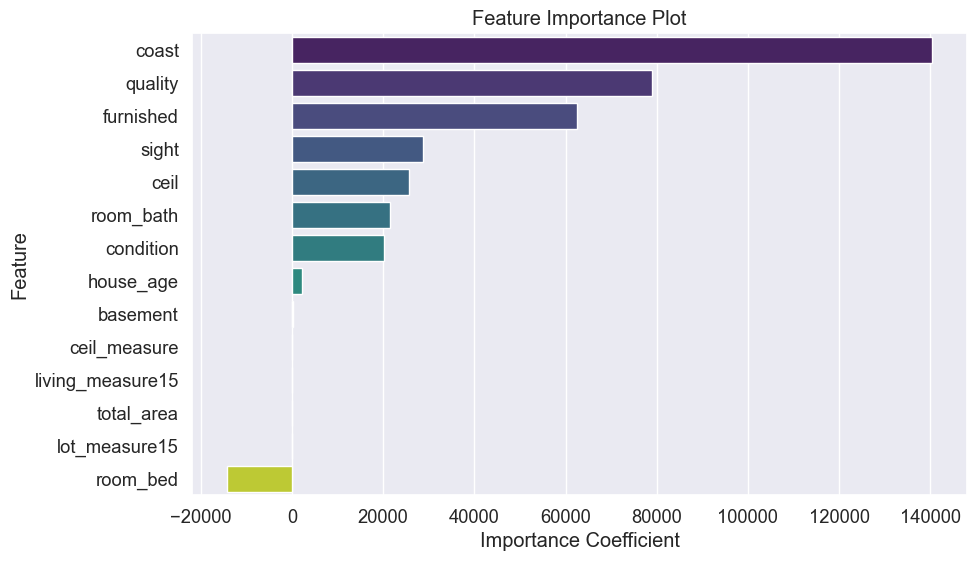

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importance coefficients
feature_importance = regression_model.coef_[0]

# Print the lengths of feature names and importance coefficients
print("Length of feature names:", len(x_train.columns))
print("Length of importance coefficients:", len(feature_importance))

# Create a DataFrame to store feature names and their importance coefficients
feature_importance_df = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance coefficients
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis')
plt.title('Feature Importance Plot')
plt.xlabel('Importance Coefficient')
plt.ylabel('Feature')
plt.show()




In [95]:
print("Feature names:", x_train.columns)
print("Importance coefficients:", feature_importance)


Feature names: Index(['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition',
       'quality', 'ceil_measure', 'basement', 'living_measure15',
       'lot_measure15', 'furnished', 'total_area', 'house_age'],
      dtype='object')
Importance coefficients: [-1.42073495e+04  2.13728369e+04  2.56955830e+04  1.40365878e+05
  2.86603811e+04  2.02460305e+04  7.88709643e+04  8.48597560e+01
  1.14638786e+02  5.86313473e+01 -4.14981780e+00  6.25632755e+04
 -1.27562011e+00  2.25573483e+03]


In [117]:
ss=StandardScaler() 
# we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
x_train_scaled=ss.fit_transform(x_train)
x_test_scaled=ss.transform(x_test)

**Make 4 models using ANN, Decision Tree, Random Forest, and Linear Regression**

- Check Train and Test RMSE
- Check Train and Test Scores

In [118]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import tree
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

In [121]:
rfr = RandomForestRegressor(random_state=123)
dtr = tree.DecisionTreeRegressor(random_state=123)
regression_model = LinearRegression()

models=[regression_model,dtr,rfr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]

for i in models:  # we are scaling the data for ANN. Without scaling it will give very poor results. Computations becomes easier
    
 
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
 

        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor']))

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                            Train RMSE      Test RMSE  Training Score  \
Linear Regression        146602.060337  146173.568400        0.659195   
Decision Tree Regressor    8286.192334  181869.337565        0.998911   
Random Forest Regressor   49285.739495  129987.626903        0.961482   

                         Test Score  
Linear Regression          0.651041  
Decision Tree Regressor    0.459799  
Random Forest Regressor    0.724043  


In [127]:
param_grid = {
    'max_depth': [10,15,20,25,30],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [15,30,35,40,50],
}

dtr=tree.DecisionTreeRegressor(random_state=123)

grid_search = GridSearchCV(estimator = dtr, param_grid = param_grid, cv = 3)


grid_search.fit(x_train,y_train)

print(grid_search.best_params_)

{'max_depth': 20, 'min_samples_leaf': 30, 'min_samples_split': 15}


Let us take Max_depth as 10, min_samples_leaf as 15 and Min_sample_split as 15. You are welcome to try other values as well.

**Using Grid Search for Random Forest**

In [130]:
param_grid = {
    'max_depth': [7,10],
    'max_features': [4, 6],
    'min_samples_leaf': [3, 15,30],
    'min_samples_split': [30, 50,100],
    'n_estimators': [101]
}

rfr = RandomForestRegressor(random_state=123)

grid_search = GridSearchCV(estimator = rfr, param_grid = param_grid, cv = 3)

In [132]:
print(grid_search.best_params_)

{'max_depth': 10, 'max_features': 6, 'min_samples_leaf': 3, 'min_samples_split': 30, 'n_estimators': 101}


In [131]:
grid_search.fit(x_train,y_train)

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConvers

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=123),
             param_grid={'max_depth': [7, 10], 'max_features': [4, 6],
                         'min_samples_leaf': [3, 15, 30],
                         'min_samples_split': [30, 50, 100],
                         'n_estimators': [101]})

In [133]:

dtr = tree.DecisionTreeRegressor(max_depth=10,min_samples_split=15,min_samples_leaf=15,random_state=123)
regression_model = LinearRegression()

rfr = RandomForestRegressor(max_depth=10, max_features=6, 
                            min_samples_leaf= 3,
                            min_samples_split= 30, n_estimators= 500,
                            random_state=123)

models=[regression_model,dtr,rfr]

rmse_train=[]
rmse_test=[]
scores_train=[]
scores_test=[]
mape_train=[]
mape_test=[]

for i in models:
  
    i.fit(x_train,y_train)
    scores_train.append(i.score(x_train, y_train))
    scores_test.append(i.score(x_test, y_test))
    rmse_train.append(np.sqrt(mean_squared_error(y_train,i.predict(x_train))))
    rmse_test.append(np.sqrt(mean_squared_error(y_test,i.predict(x_test))))
        
  
        
        
print(pd.DataFrame({'Train RMSE': rmse_train,'Test RMSE': rmse_test,'Training Score':scores_train,'Test Score': scores_test},
            index=['Linear Regression','Decision Tree Regressor','Random Forest Regressor']))

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


                            Train RMSE      Test RMSE  Training Score  \
Linear Regression        146602.060337  146173.568400        0.659195   
Decision Tree Regressor  127342.602026  142514.228917        0.742857   
Random Forest Regressor  120945.438432  133225.848874        0.768044   

                         Test Score  
Linear Regression          0.651041  
Decision Tree Regressor    0.668294  
Random Forest Regressor    0.710123  


In [134]:
#creating a copy of the final dataframe
dff2=df.copy()

In [135]:
df_train, df_test = train_test_split(dff2, test_size=0.2, random_state=10)
df_train, df_val = train_test_split(df_train, test_size=0.2, random_state=10)

In [136]:
print(df_train.shape)
print(df_test.shape)
print(df_val.shape)

(13832, 15)
(4323, 15)
(3458, 15)


In [137]:
# Split the 'df_train' set into X and y
X_train2 = df_train.drop(['price'],axis=1)
y_train2 = df_train['price']
len_train=len(X_train2)
X_train2.shape
y_train2.head()

19630    400000.0
10954    480000.0
19824    498500.0
3471     472000.0
3688     650000.0
Name: price, dtype: float64

In [138]:
# Split the 'df_val' set into X and y
X_val2 = df_val.drop(['price'],axis=1)
y_val2 = df_val['price']
len_val=len(X_val2)
X_val2.shape
y_val2.head()

13267     426000.0
19400    1129575.0
16121     275900.0
4082      600000.0
8779      290000.0
Name: price, dtype: float64

In [139]:
# Split the 'df_test' set into X and y
X_test2 = df_test.drop(['price'],axis=1)
y_test2 = df_test['price']
X_test2.shape
len_test=len(X_test2)
y_test2.head()

957      345000.0
14143    449000.0
19452    448500.0
20510    415000.0
18354    436000.0
Name: price, dtype: float64

In [170]:
#Creating empty dataframe to capture results
result_dff=pd.DataFrame()

In [171]:
#Function to give results of the models for its train and validation dataset.
#as input it requries model name to display, algorithm, train indepedent variables, train dependent variable, 
#validation indepedent variables, validation dependent variable.
def result (model,pipe_model,X_train_set,y_train_set,X_val_set,y_val_set):
    pipe_model.fit(X_train_set,y_train_set)
    #predicting result over test data
    y_train_predict= pipe_model.predict(X_train_set)
    y_val_predict= pipe_model.predict(X_val_set)

    trscore=r2_score(y_train_set,y_train_predict)
    trRMSE=np.sqrt(mean_squared_error(y_train_set,y_train_predict))
    trMSE=mean_squared_error(y_train_set,y_train_predict)
    trMAE=mean_absolute_error(y_train_set,y_train_predict)

    vlscore=r2_score(y_val,y_val_predict)
    vlRMSE=np.sqrt(mean_squared_error(y_val,y_val_predict))
    vlMSE=mean_squared_error(y_val,y_val_predict)
    vlMAE=mean_absolute_error(y_val,y_val_predict)
    result_df=pd.DataFrame({'Method':[model],'val score':vlscore,'RMSE_val':vlRMSE,'MSE_val':vlMSE,'MAE_vl': vlMAE,
                          'train Score':trscore,'RMSE_tr': trRMSE,'MSE_tr': trMSE, 'MAE_tr': trMAE})
    plt.figure(figsize=(8, 6))
    sns.kdeplot(y_val_set, color='blue', label='Actual', shade=True, linewidth=2, linestyle='-', alpha=0.7)
    sns.kdeplot(y_val_predict, color='orange', label='Predicted', shade=True, linewidth=3, linestyle=':', alpha=0.9)
    plt.xlabel('Values')
    plt.ylabel('Density')
    plt.title('Density Plot of Actual vs Predicted Values')
    plt.legend()


                      # Y-label

    return result_df

In [172]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10)

LINEAR REGRESSION

In [173]:
#Starting with RFE first as there are many features
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

C:\Users\91994\AppData\Local\Temp\ipykernel_10600\1744833061.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_val_set, color='blue', label='Actual', shade=True, linewidth=2, linestyle='-', alpha=0.7)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

,Method,val score,RMSE_val,MSE_val,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg,0.648752,150328.005207,2.259851e+10,114769.600581,0.656995,145693.343521,2.122655e+10,111716.666025


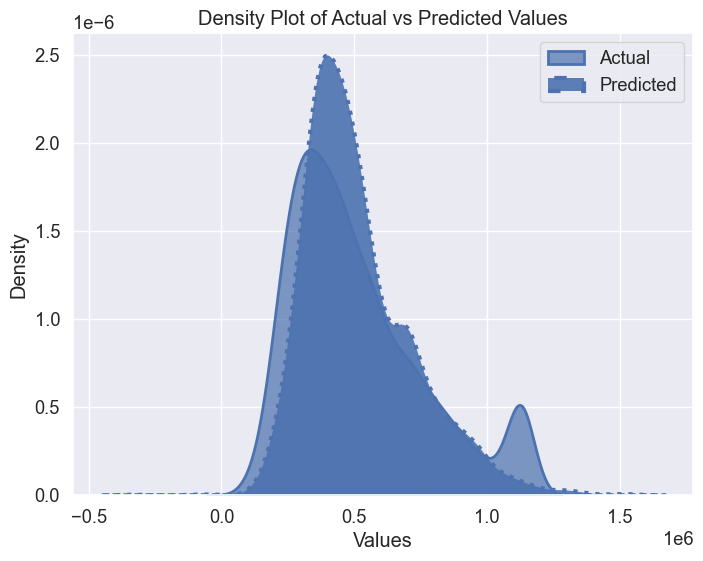

In [174]:
clf=LinearRegression()
pipe_lr = Pipeline([('LR', clf)])
result_dff=pd.concat([result_dff,result('Linear Reg',pipe_lr,X_train,y_train,X_val,y_val)])
result_dff

In [177]:
clf.coef_

array([[-1.34270769e+04,  2.15532659e+04,  3.10081866e+04,
         1.47803975e+05,  2.77522211e+04,  2.13558842e+04,
         8.30010032e+04,  8.13444510e+01,  1.10228635e+02,
         5.48062756e+01, -4.62528253e+00,  6.25403766e+04,
        -1.30544732e+00,  2.30311544e+03]])

In [178]:
X_train.columns

Index(['room_bed', 'room_bath', 'ceil', 'coast', 'sight', 'condition',
       'quality', 'ceil_measure', 'basement', 'living_measure15',
       'lot_measure15', 'furnished', 'total_area', 'house_age'],
      dtype='object')

<Axes: title={'center': 'Model Coefficients'}>

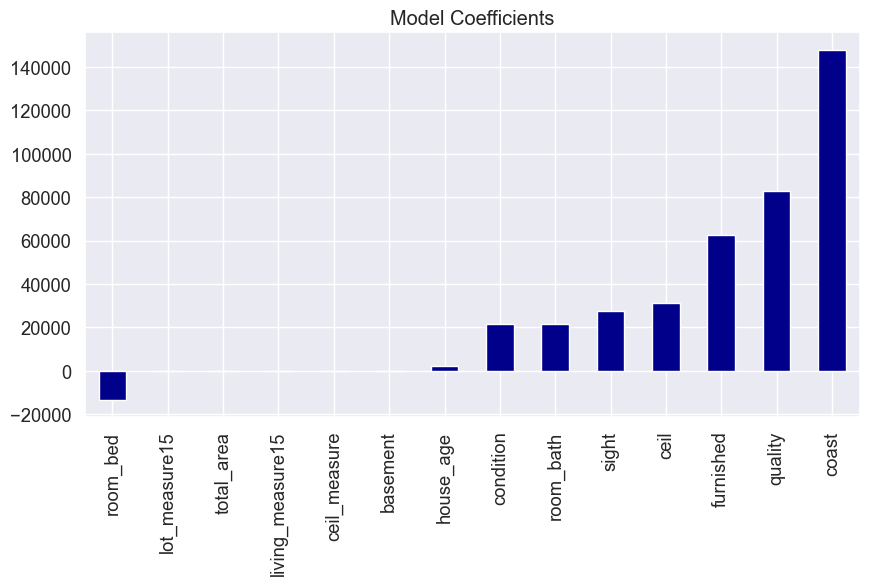

In [179]:
#checking the magnitude of coefficients
predictors = X_train.columns
coef = pd.Series(clf.coef_[0], predictors).sort_values()
coef.plot(kind='bar', title='Model Coefficients', color='darkblue', figsize=(10, 5))




### KNN Regressor

C:\Users\91994\AppData\Local\Temp\ipykernel_10600\1744833061.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_val_set, color='blue', label='Actual', shade=True, linewidth=2, linestyle='-', alpha=0.7)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

,Method,val score,RMSE_val,MSE_val,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg,0.648752,150328.005207,2.259851e+10,114769.600581,0.656995,145693.343521,2.122655e+10,111716.666025
0,KNN Reg,0.581294,164129.880929,2.693862e+10,126163.969722,0.998742,8821.675874,7.782197e+07,753.793378


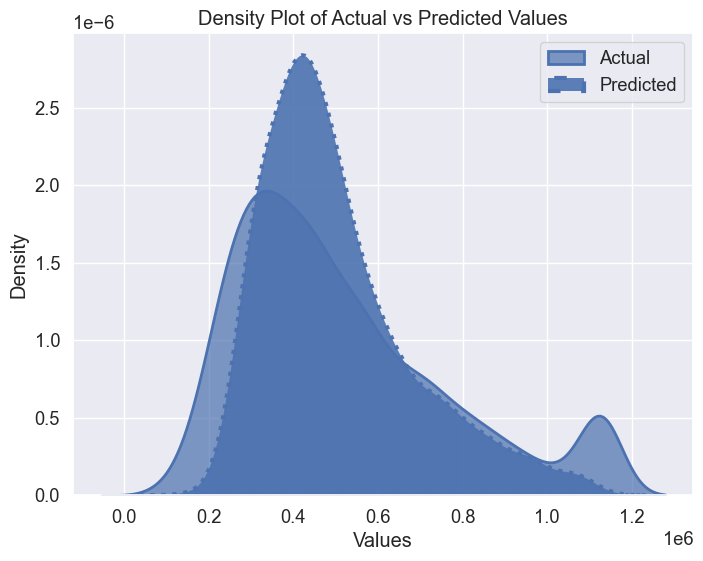

In [180]:
from sklearn.neighbors import KNeighborsRegressor

pipe_knr = Pipeline([('KNNR', KNeighborsRegressor(n_neighbors=20,weights='distance'))])
result_dff=pd.concat([result_dff,result('KNN Reg',pipe_knr,X_train,y_train,X_val,y_val)])
result_dff

In [181]:
#Feature importance function
def feat_imp(model,X_data_set):
    imp_feature_1=pd.DataFrame(model.feature_importances_, columns = ["Imp"], index = X_data_set.columns)
    imp_feature_1=imp_feature_1.sort_values(by="Imp",ascending=False)
    print(imp_feature_1)
    
    #feature importance
    plt.figure(figsize=(10,10))
    imp_feature_1[:30].plot.bar(figsize=(15,5))

    #First 20 and 30 feature importance sum
    print("\nFirst 8 feature importance:\t",(imp_feature_1[:8].sum())*100)
    print("\nFirst 12 feature importance:\t",(imp_feature_1[:12].sum())*100)

C:\Users\91994\AppData\Local\Temp\ipykernel_10600\1744833061.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_val_set, color='blue', label='Actual', shade=True, linewidth=2, linestyle='-', alpha=0.7)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(

,Method,val score,RMSE_val,MSE_val,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg,0.648752,150328.005207,2.259851e+10,114769.600581,0.656995,145693.343521,2.122655e+10,111716.666025
0,KNN Reg,0.581294,164129.880929,2.693862e+10,126163.969722,0.998742,8821.675874,7.782197e+07,753.793378
0,DT1,0.465460,185448.486739,3.439114e+10,132345.041064,0.998742,8821.675874,7.782197e+07,753.793378


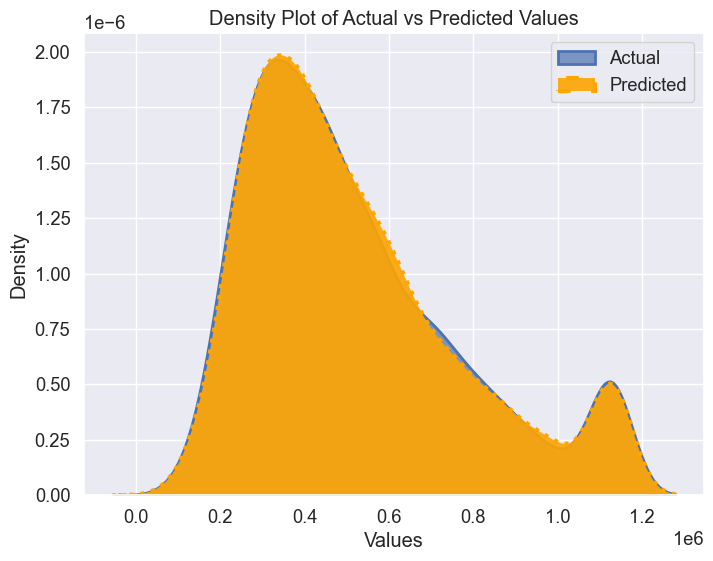

In [182]:
#Import library
from sklearn.tree import DecisionTreeRegressor

clf=DecisionTreeRegressor(random_state=1)
pipe_DT_1=Pipeline([('DT1',clf)])
result_dff=pd.concat([result_dff,result('DT1',pipe_DT_1,X_train,y_train,X_val,y_val)])
result_dff

                       Imp
quality           0.504686
house_age         0.103271
living_measure15  0.077586
ceil_measure      0.076007
lot_measure15     0.063587
basement          0.049485
total_area        0.042151
sight             0.024853
room_bath         0.023639
room_bed          0.013119
condition         0.010580
ceil              0.008671
coast             0.002365
furnished         0.000000

First 8 feature importance:	 Imp    94.162662
dtype: float64

First 12 feature importance:	 Imp    99.763511
dtype: float64


<Figure size 1000x1000 with 0 Axes>

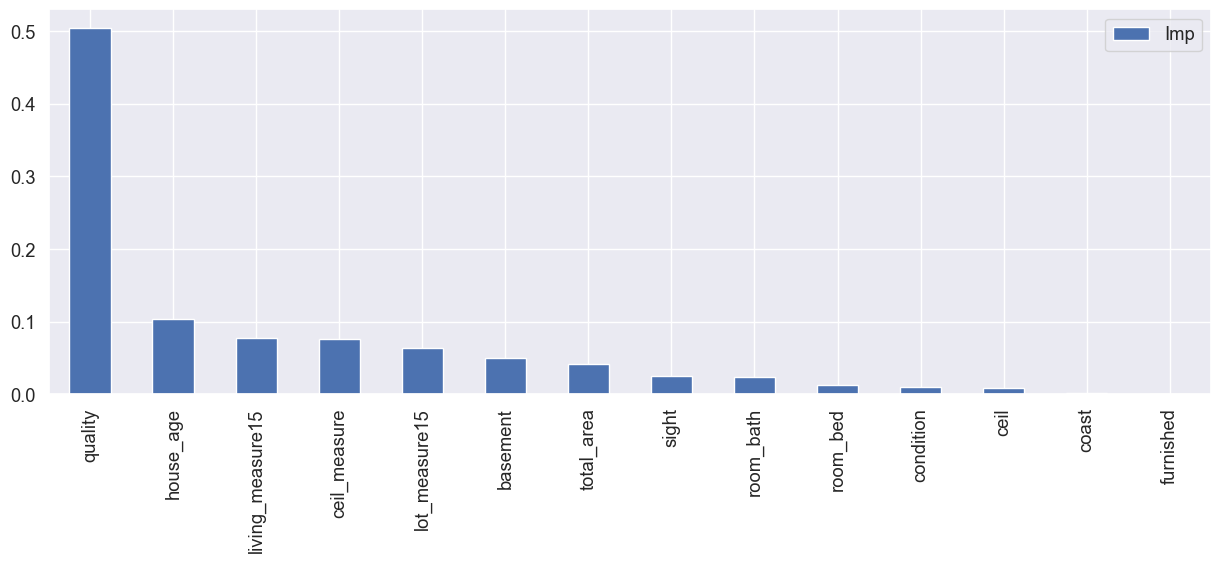

In [183]:
#Feature importance
feat_imp(clf,X_train)

c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:1351: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
C:\Users\91994\AppData\Local\Temp\ipykernel_10600\1744833061.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(y_val_set, color='blue', label='Actual', shade=True, linewidth=2, linestyle='-', alpha=0.7)
c:\Users\91994\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\91994\AppData\Local\Prog

,Method,val score,RMSE_val,MSE_val,MAE_vl,train Score,RMSE_tr,MSE_tr,MAE_tr
0,Linear Reg,0.648752,150328.005207,2.259851e+10,114769.600581,0.656995,145693.343521,2.122655e+10,111716.666025
0,KNN Reg,0.581294,164129.880929,2.693862e+10,126163.969722,0.998742,8821.675874,7.782197e+07,753.793378
0,DT1,0.465460,185448.486739,3.439114e+10,132345.041064,0.998742,8821.675874,7.782197e+07,753.793378
0,RF1,0.726688,132605.824821,1.758430e+10,98513.176667,0.960728,49298.249847,2.430317e+09,36523.064375


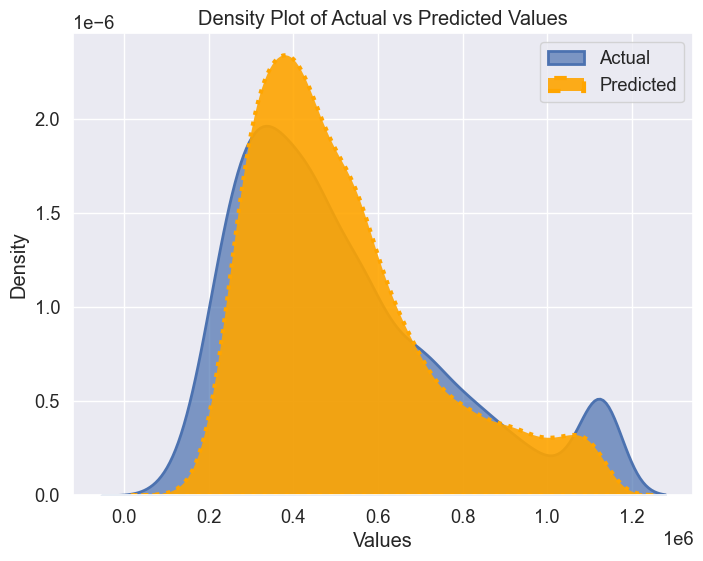

In [184]:
clf=RandomForestRegressor(random_state=2)
pipe_RF_1=Pipeline([('RF1',clf)])
result_dff=pd.concat([result_dff,result('RF1',pipe_RF_1,X_train,y_train,X_val,y_val)])
result_dff

In [185]:
from xgboost.sklearn import XGBRegressor

clf=XGBRegressor(objective='reg:squarederror',random_state=6)
pipe_XGB_1=Pipeline([('XGB1',clf)])
result_dff=pd.concat([result_dff,result('XGB1',pipe_XGB_1,X_train,y_train,X_val,y_val)])
result_dff

ModuleNotFoundError: No module named 'xgboost'